In [ ]:
# for colab

from google.colab import drive
import os

drive.mount('/content/drive')
main_dir = '/content/drive/MyDrive/Graduate Project'
os.chdir(main_dir)
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/Graduate Project'

In [ ]:
import pandas as pd

zillow_df = pd.read_csv(os.path.join(main_dir, 'dataset', '1. zillow.csv'), dtype=str)
zillow_df

buildingPermits                                 contact_recipients  \
0                 NaN  [{'agent_reason': 1, 'zpro': None, 'recent_sal...   
1                 NaN  [{'agent_reason': 1, 'zpro': None, 'recent_sal...   
2                 NaN  [{'agent_reason': 1, 'zpro': None, 'recent_sal...   
3                 NaN  [{'agent_reason': 1, 'zpro': None, 'recent_sal...   
4                 NaN  [{'agent_reason': 1, 'zpro': None, 'recent_sal...   
...               ...                                                ...   
25529             NaN  [{'agent_reason': 1, 'zpro': None, 'recent_sal...   
25530             NaN  [{'agent_reason': 1, 'zpro': None, 'recent_sal...   
25531             NaN                                                NaN   
25532             NaN  [{'agent_reason': 1, 'zpro': None, 'recent_sal...   
25533             NaN  [{'agent_reason': 1, 'zpro': None, 'recent_sal...   

        longitude countyFIPS  \
0      -87.532524    17031.0   
1       -87.64724    17031.0   
2      -87.639694    17031.0   
3       -87.63923    17031.0   
4       -87.68223    17031.0   
...           ...        ...   
25529   -73.97914    36047.0   
25530   -74.23936    36085.0   
25531   -73.78792    36081.0   
25532   -73.91516    36047.0   
25533  -73.918816    36047.0   

                                                  imgSrc livingAreaValue  \
0      https://photos.zillowstatic.com/fp/91d41ed0b83...          2376.0   
1      https://photos.zillowstatic.com/fp/f9090e38344...           910.0   
2      https://photos.zillowstatic.com/fp/650e35d44e7...           900.0   
3      https://maps.googleapis.com/maps/api/streetvie...             NaN   
4      https://photos.zillowstatic.com/fp/28b408bc674...             0.0   
...                                                  ...             ...   
25529  https://maps.googleapis.com/maps/api/staticmap...          2856.0   
25530  https://photos.zillowstatic.com/fp/a86119e5f62...          2250.0   
25531  https://maps.googleapis.com/maps/api/staticmap...          1190.0   
25532  https://photos.zillowstatic.com/fp/c6f2815a1ce...          2220.0   
25533  https://maps.googleapis.com/maps/api/streetvie...          1496.0   

                  streetAddress           county monthlyHoaFee  \
0              10905 S Avenue H      Cook County           NaN   
1      740 W Fulton St APT 1106      Cook County         510.0   
2          475 W 24th St APT 5H      Cook County         215.0   
3         501 W 24th Pl APT 111      Cook County         365.0   
4             2141 W Warner Ave      Cook County           NaN   
...                         ...              ...           ...   
25529              1858 48th St     Kings County           NaN   
25530        314 Loretto Street  Richmond County           NaN   
25531          20546 Brian Cres    Queens County           NaN   
25532                63 Hull St     Kings County           NaN   
25533                5 Abbey Ct     Kings County           NaN   

               timeZone  ... resoFacts.garageSpaces resoFacts.waterSources  \
0       America/Chicago  ...                    NaN                    NaN   
1       America/Chicago  ...                    NaN                    NaN   
2       America/Chicago  ...                    NaN                    NaN   
3       America/Chicago  ...                    NaN                    NaN   
4       America/Chicago  ...                    NaN                    NaN   
...                 ...  ...                    ...                    ...   
25529  America/New_York  ...                    NaN                    NaN   
25530  America/New_York  ...                    NaN                    NaN   
25531  America/New_York  ...                    NaN                    NaN   
25532  America/New_York  ...                    NaN                    NaN   
25533  America/New_York  ...                    NaN                    NaN   

      resoFacts.depositsAndFees resoFacts.allowedPets  \
0       

## Seasonal Effect

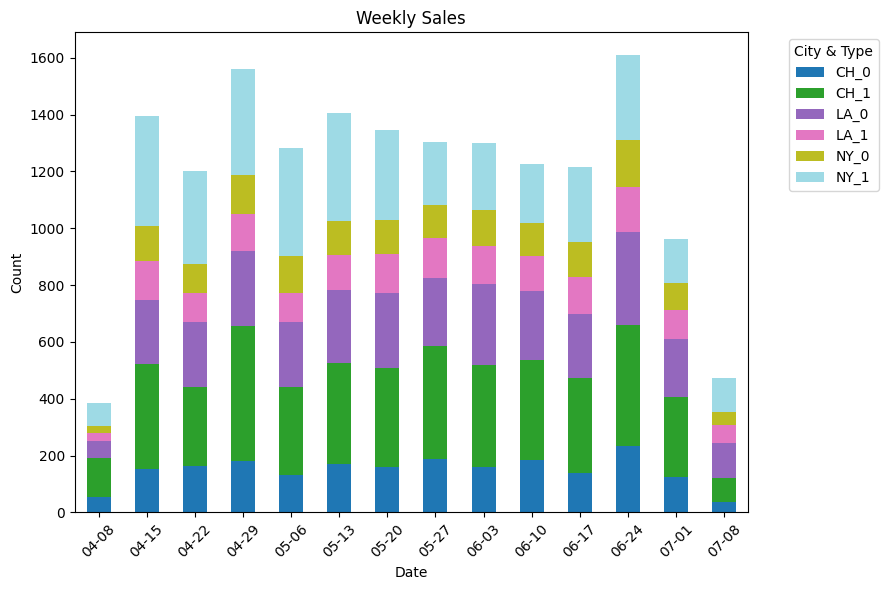

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming zillow_cleaned_df is already defined and contains 'dateSold', 'state', and 'homeType'

filter_date = zillow_df[(zillow_df['dateSold'].isna())|(zillow_df['datePosted'].isna())].index
filter_type = zillow_df[~zillow_df['homeType'].isin(['SINGLE_FAMILY', 'CONDO', 'MULTI_FAMILY', 'TOWNHOUSE', 'APARTMENT'])].index

zillow_df = zillow_df.loc[~zillow_df.index.isin(filter_date)]
zillow_df = zillow_df.loc[~zillow_df.index.isin(filter_type)]

df = zillow_df.copy()
df['date'] = pd.to_datetime(df['dateSold'])

# Calculate the start date of each week
df['week_start'] = df['date'].dt.to_period('W').apply(lambda r: r.start_time.strftime('%m-%d'))

# Create a combined category for region/single
df['region'] = df['state'].map({'IL': 'CH', 'NY': 'NY', 'CA': 'LA'})
df['single'] = df['homeType'].map({'SINGLE_FAMILY': 0, 'TOWNHOUSE': 1, 'CONDO': 1, 'MULTI_FAMILY': 1, 'APARTMENT': 1})
df['region_single'] = df['region'] + '_' + df['single'].astype(str)  # Combine region and single

# Group by week_start and region_single, then count occurrences
grouped = df.groupby(['week_start', 'region_single']).size().reset_index(name='count')

# Pivot data to prepare for stacked bar chart
pivot_table = grouped.pivot(index='week_start', columns='region_single', values='count').fillna(0)

# Plotting the stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(9, 6), colormap='tab20')
plt.title('Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='City & Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Basic Check

## Description

### NA

In [ ]:
filter_na = zillow_df[zillow_df['description'].isna()].index
filter_na

Index([   70,   235,   297,   575,   700,   731,  1624,  1625,  1930,  2166,
       ...
       24288, 24475, 24476, 24700, 24891, 24934, 25026, 25150, 25230, 25346],
      dtype='int64', length=234)

### Auto

In [ ]:
zillow_df['description'][3] # Address and Price-related info

'501 W 24th Pl APT 111, Chicago, IL 60616 is a condo home that was built in 1978. This home last sold for $275,000 in May 2024. \n \nThe Zestimate for this house is $339,700. The Rent Zestimate for this home is $1,786/mo. '

In [ ]:
patterns = ["This home last sold for", "The Zestimate for", "The Rent Zestimate for"]
filter_auto = zillow_df[zillow_df['description'].str.contains('|'.join(patterns), na=False)].index
filter_auto

Index([    3,     7,    13,    15,    39,    40,    46,    61,    74,    76,
       ...
       25494, 25498, 25507, 25508, 25514, 25524, 25525, 25528, 25529, 25533],
      dtype='int64', length=5006)

## House Attribute

### Recently Sold

In [ ]:
zillow_df['homeStatus'][89] # Rent, On Sale, etc.

'FOR_RENT'

In [ ]:
filter_recentlySold = zillow_df[zillow_df['homeStatus'] != 'RECENTLY_SOLD'].index
filter_recentlySold

Index([   89,   270,   317,   320,   345,   506,   622,   628,   727,   744,
       ...
       25220, 25258, 25275, 25313, 25392, 25398, 25446, 25483, 25518, 25523],
      dtype='int64', length=605)

### Type

In [ ]:
zillow_df['homeType'][13]

'HOME_TYPE_UNKNOWN'

In [ ]:
filter_type = zillow_df[~zillow_df['homeType'].isin(['SINGLE_FAMILY', 'CONDO', 'MULTI_FAMILY', 'TOWNHOUSE', 'APARTMENT'])].index
filter_type

Index([   13,    22,    23,    45,    56,   171,   225,   329,   446,   454,
       ...
       24676, 24791, 24957, 25036, 25060, 25063, 25104, 25129, 25229, 25460],
      dtype='int64', length=488)

### Coordinate

In [ ]:
filter_coordinate = zillow_df[(zillow_df['longitude'].isna()) | (zillow_df['latitude'].isna())].index
filter_coordinate

Index([  594,   681,   721,   758,   769,   858,   988,  1330,  1454,  1522,
        1669,  1951,  2156,  2371,  2560,  2951,  3132,  3193,  3383,  3541,
        3634,  4247,  4470,  4552,  4677,  4704,  4723,  4984,  5127,  5213,
        5791,  6181,  6285,  6748,  7149,  7255,  7263,  7480,  7592,  7708,
        7726,  7819,  7898,  7944,  7996,  8065,  8158,  8877,  9569,  9928,
       10153, 10908, 11491, 14687, 14828, 16006, 16672, 17691, 18312, 18571,
       19879, 19912, 20030, 20609, 22960, 23039, 23614, 24658],
      dtype='int64')

### State

In [ ]:
zillow_df['state'][20383] # Mistake

'NJ'

In [ ]:
filter_state = zillow_df[~zillow_df['state'].isin(['NY', 'IL', 'CA'])].index
filter_state

Index([20383], dtype='int64')

### Additional Parcels

In [ ]:
zillow_df['resoFacts.hasAdditionalParcels'][5] # Not only the house

'True'

In [ ]:
filter_additionalParcels = zillow_df[zillow_df['resoFacts.hasAdditionalParcels'] != 'False'].index
filter_additionalParcels

Index([    5,    11,    12,    18,    21,    25,    34,    45,    56,    95,
       ...
       12194, 12759, 12790, 12810, 12872, 12973, 13700, 13731, 13939, 14089],
      dtype='int64', length=754)

### Date

In [ ]:
filter_date = zillow_df[(zillow_df['dateSold'].isna())|(zillow_df['datePosted'].isna())].index
filter_date

Index([    1,     3,     7,    13,    14,    15,    39,    40,    46,    59,
       ...
       25522, 25523, 25524, 25525, 25526, 25528, 25529, 25531, 25532, 25533],
      dtype='int64', length=8600)

### Duration (Days on Market)

In [ ]:
zillow_df['dateSold'] = pd.to_datetime(zillow_df['dateSold'])
zillow_df['datePosted'] = pd.to_datetime(zillow_df['datePosted'])
zillow_df['duration'] = (zillow_df['dateSold'] - zillow_df['datePosted']).dt.days

filter_duration = zillow_df[zillow_df['duration'] < 0].index
filter_duration

Index([    8,    24,    33,    58,    70,    75,   156,   306,   364,   381,
       ...
       18740, 19912, 19937, 20383, 21397, 22215, 22236, 23965, 24476, 25501],
      dtype='int64', length=810)

### Parking

In [ ]:
filter_parking = zillow_df[zillow_df['resoFacts.parkingCapacity'].isna()].index
filter_parking

Index([2329, 10582, 13287], dtype='int64')

### Bathroom

In [ ]:
filter_bathroom = zillow_df[zillow_df['resoFacts.bathroomsFloat'].isna()].index
filter_bathroom

Index([    3,     7,    13,    22,    23,    45,    56,    76,    92,   113,
       ...
       25492, 25494, 25498, 25507, 25508, 25514, 25525, 25528, 25529, 25533],
      dtype='int64', length=3188)

### Bedroom

In [ ]:
filter_bedroom = zillow_df[zillow_df['resoFacts.bedrooms'].isna()].index
filter_bedroom

Index([    3,     7,    13,    22,    23,    45,    56,    76,   113,   144,
       ...
       25492, 25494, 25498, 25507, 25508, 25514, 25525, 25528, 25529, 25533],
      dtype='int64', length=3514)

### Age

In [ ]:
zillow_df['age'] = 2024 - zillow_df['resoFacts.yearBuilt'].astype(float)

filter_age = zillow_df[zillow_df['age'].isna()].index
filter_age

Index([    4,     7,    13,    22,    23,    38,    39,    45,    53,    56,
       ...
       25291, 25307, 25322, 25429, 25435, 25446, 25480, 25489, 25493, 25516],
      dtype='int64', length=1781)

### Living Area

In [ ]:
filter_livingArea = zillow_df[zillow_df['livingArea'].isna()].index
filter_livingArea

Index([    3,     7,    13,    17,    19,    22,    23,    29,    30,    39,
       ...
       25454, 25457, 25460, 25461, 25475, 25492, 25496, 25515, 25525, 25528],
      dtype='int64', length=4050)

## Drop

In [ ]:
print(f"{len(zillow_df)} Listings")

zillow_df = zillow_df.loc[~zillow_df.index.isin(filter_na)]
print(f"Desc) NA: {len(zillow_df)} Listings")

zillow_df = zillow_df.loc[~zillow_df.index.isin(filter_auto)]
print(f"Desc) Auto: {len(zillow_df)} Listings")

zillow_df = zillow_df.loc[~zillow_df.index.isin(filter_recentlySold)]
print(f"HA) Recently Sold: {len(zillow_df)} Listings")

zillow_df = zillow_df.loc[~zillow_df.index.isin(filter_type)]
print(f"HA) Type: {len(zillow_df)} Listings")

zillow_df = zillow_df.loc[~zillow_df.index.isin(filter_coordinate)]
print(f"HA) Coordinate: {len(zillow_df)} Listings")

zillow_df = zillow_df.loc[~zillow_df.index.isin(filter_state)]
print(f"HA) State: {len(zillow_df)} Listings")

zillow_df = zillow_df.loc[~zillow_df.index.isin(filter_additionalParcels)]
print(f"HA) Additional Parcels: {len(zillow_df)} Listings")

zillow_df = zillow_df.loc[~zillow_df.index.isin(filter_date)]
print(f"HA) Date: {len(zillow_df)} Listings")

zillow_df = zillow_df.loc[~zillow_df.index.isin(filter_duration)]
print(f"HA) Duration: {len(zillow_df)} Listings")

zillow_df = zillow_df.loc[~zillow_df.index.isin(filter_parking)]
print(f"HA) Parking: {len(zillow_df)} Listings")

zillow_df = zillow_df.loc[~zillow_df.index.isin(filter_bathroom)]
print(f"HA) Bathroom: {len(zillow_df)} Listings")

zillow_df = zillow_df.loc[~zillow_df.index.isin(filter_bedroom)]
print(f"HA) Bedroom: {len(zillow_df)} Listings")

zillow_df = zillow_df.loc[~zillow_df.index.isin(filter_age)]
print(f"HA) Age: {len(zillow_df)} Listings")

zillow_df = zillow_df.loc[~zillow_df.index.isin(filter_livingArea)]
print(f"HA) Living Area: {len(zillow_df)} Listings")

25534 Listings
Desc) NA: 25300 Listings
Desc) Auto: 20294 Listings
HA) Recently Sold: 19695 Listings
HA) Type: 19405 Listings
HA) Coordinate: 19343 Listings
HA) State: 19342 Listings
HA) Additional Parcels: 18605 Listings
HA) Date: 15654 Listings
HA) Duration: 14899 Listings
HA) Parking: 14898 Listings
HA) Bathroom: 14887 Listings
HA) Bedroom: 14722 Listings
HA) Age: 14079 Listings
HA) Living Area: 12340 Listings


# Chicago

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import percentileofscore
import numpy as np

In [ ]:
chicago_df = zillow_df[zillow_df['state'] == 'IL']

## Price

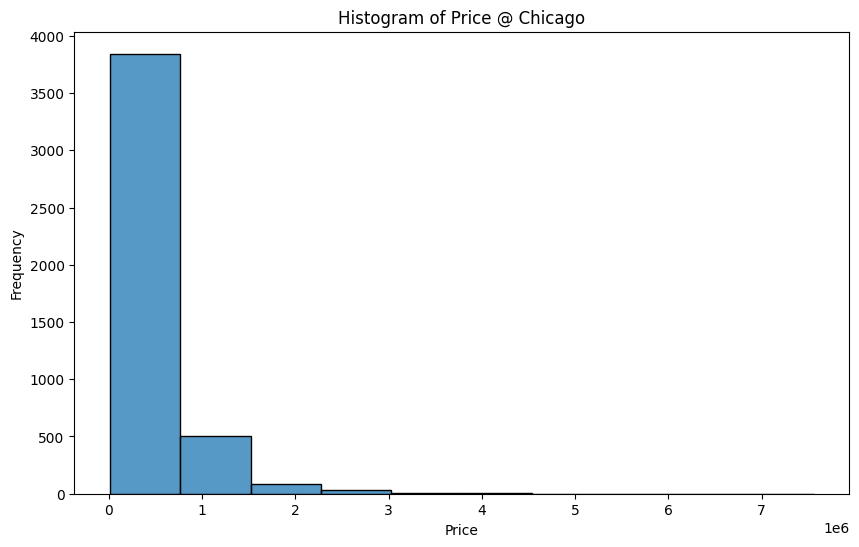

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(chicago_df['price'].astype(float), bins=10)
plt.title(f"Histogram of Price @ Chicago")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
lower_value = 5e4
upper_value = 2e6

lower_percentile = percentileofscore(chicago_df['price'].astype(float), lower_value)
upper_percentile = percentileofscore(chicago_df['price'].astype(float), upper_value)

outlier_price = chicago_df[(chicago_df['price'].astype(float) < lower_value) | (chicago_df['price'].astype(float) > upper_value)].index

print(f"Price: {lower_value}({lower_percentile:.2f}%) to {upper_value}({upper_percentile:.2f}%)")
print(outlier_price)

Price: 50000.0(0.55%) to 2000000.0(98.82%)
Index([  50,  491,  657,  765,  873,  875,  935,  947, 1173, 1308, 1757, 1770,
       1801, 1869, 1886, 1985, 2095, 2100, 2266, 2391, 2546, 2724, 2733, 2742,
       2765, 3008, 3029, 3063, 3246, 3368, 3711, 3750, 3777, 3864, 3901, 3902,
       4240, 4278, 4280, 4385, 4498, 4513, 4729, 4796, 5167, 5325, 5356, 5429,
       5489, 5800, 5858, 5924, 6112, 6331, 6443, 6502, 6532, 6560, 6581, 6654,
       6846, 6931, 6980, 7037, 7119, 7181, 7182, 7250, 7398, 7886, 7926, 8248,
       8433, 8465, 8481],
      dtype='int64')


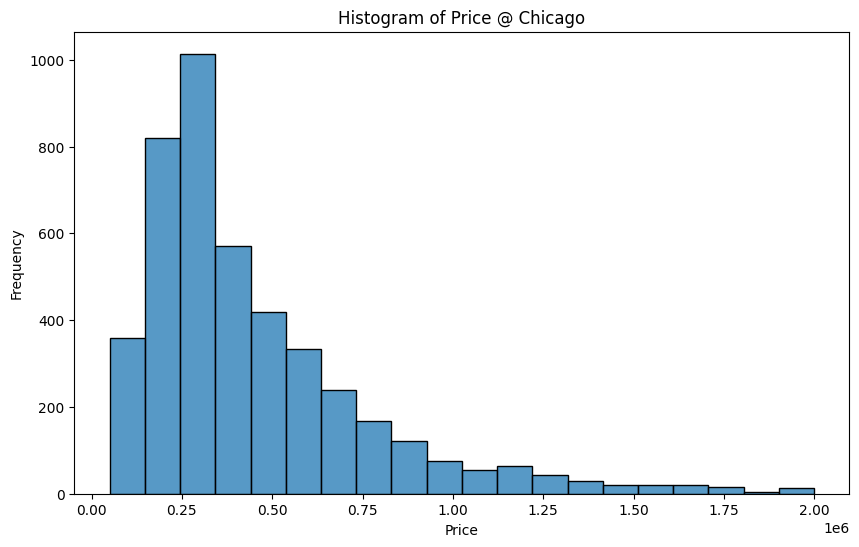

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(chicago_df.loc[~chicago_df.index.isin(outlier_price)]['price'].astype(float), bins=20)
plt.title(f"Histogram of Price @ Chicago")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

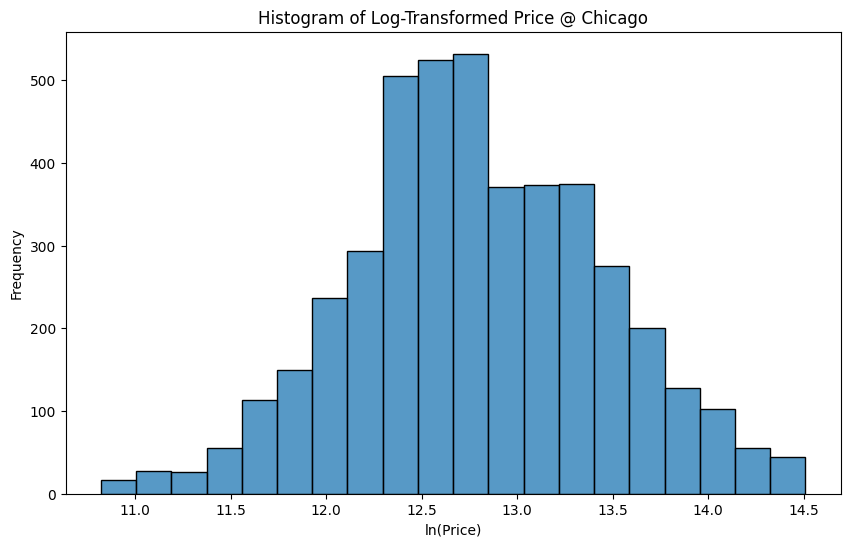

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log(chicago_df.loc[~chicago_df.index.isin(outlier_price)]['price'].astype(float)), bins=20)
plt.title(f"Histogram of Log-Transformed Price @ Chicago")
plt.xlabel('ln(Price)')
plt.ylabel('Frequency')
plt.show()

## Duration (Days on Market)

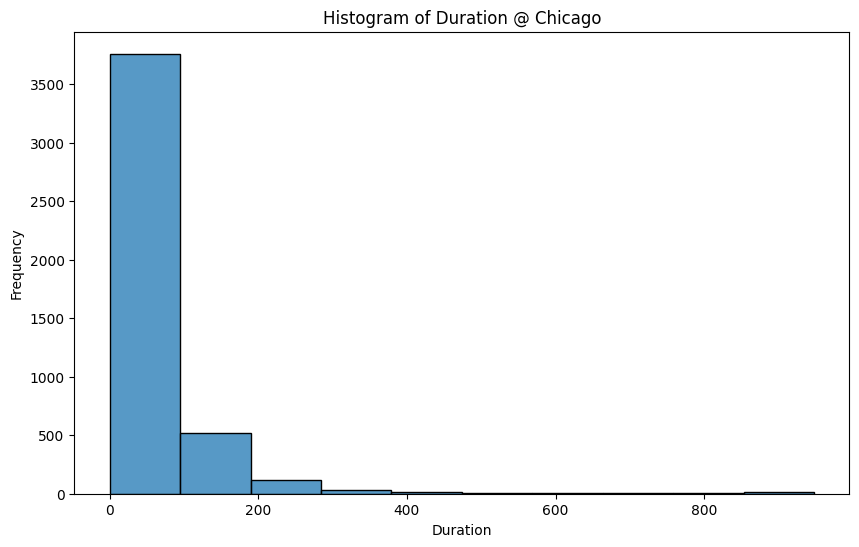

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(chicago_df['duration'].astype(float), bins=10)
plt.title(f"Histogram of Duration @ Chicago")
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

In [ ]:
lower_value = 0
upper_value = 365

lower_percentile = percentileofscore(chicago_df['duration'].astype(float), lower_value)
upper_percentile = percentileofscore(chicago_df['duration'].astype(float), upper_value)

outlier_duration = chicago_df[(chicago_df['duration'].astype(float) > upper_value)].index

print(f"Duration: {upper_value}({upper_percentile:.2f}%)")
print(outlier_duration)

Duration: 365(98.84%)
Index([ 259,  347,  409,  765,  962, 1058, 1146, 1232, 1569, 1632, 1799, 1801,
       1840, 1977, 2081, 2093, 2230, 2288, 2316, 2598, 3062, 3265, 3583, 3930,
       4063, 4215, 4276, 4280, 4332, 4391, 4698, 4811, 5099, 5142, 5154, 5356,
       5601, 5895, 6047, 6185, 6248, 6305, 6453, 6487, 6638, 6715, 6837, 6885,
       7511, 7643, 8238, 8359],
      dtype='int64')


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


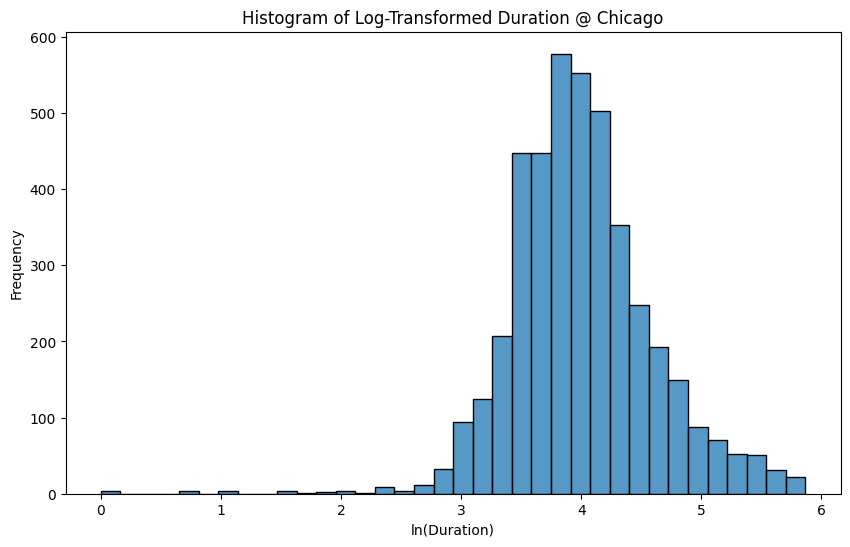

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log(chicago_df.loc[~chicago_df.index.isin(outlier_duration)]['duration']), bins=36)
plt.title(f"Histogram of Log-Transformed Duration @ Chicago")
plt.xlabel('ln(Duration)')
plt.ylabel('Frequency')
plt.show()

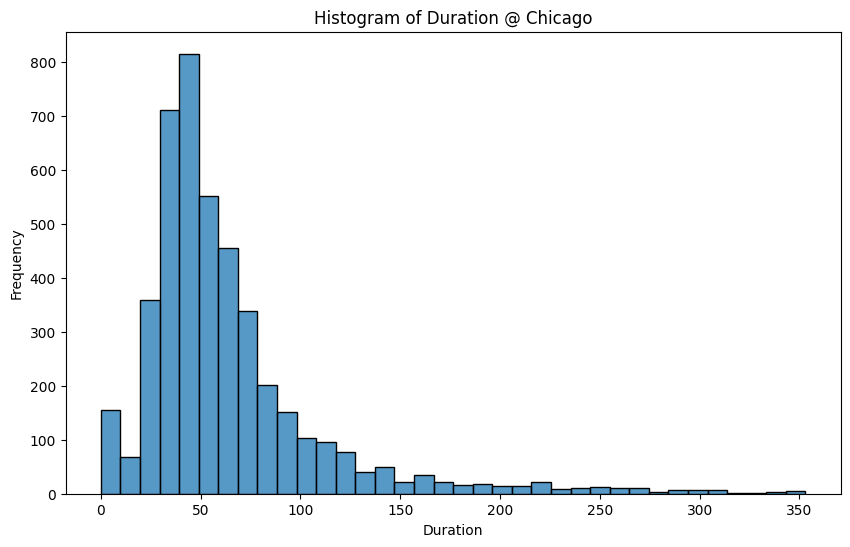

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(chicago_df.loc[~chicago_df.index.isin(outlier_duration)]['duration'], bins=36)
plt.title(f"Histogram of Duration @ Chicago")
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

## Zipcode

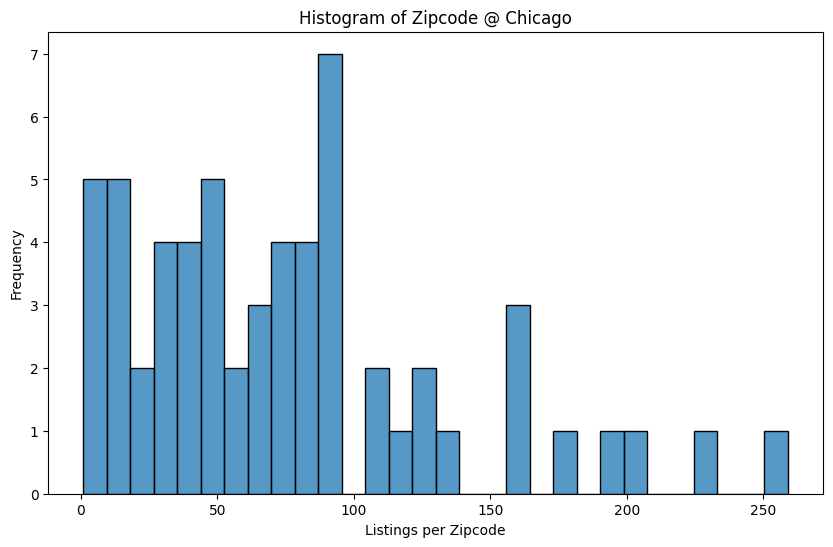

In [ ]:
counts_df = chicago_df['zipcode'].value_counts().reset_index()
counts_df.columns = ['zipcode', 'count']

plt.figure(figsize=(10, 6))
sns.histplot(counts_df['count'], bins=30)
plt.title(f"Histogram of Zipcode @ Chicago")
plt.xlabel('Listings per Zipcode')
plt.ylabel('Frequency')
plt.show()

In [ ]:
lower_value = 15
outlier_zipcode = chicago_df[chicago_df['zipcode'].isin(counts_df[counts_df['count'] < lower_value]['zipcode'])].index
print(f"Houses in zipcodes with less than {lower_value} listings @ Chicago: {len(outlier_zipcode)}({100*len(outlier_zipcode)/chicago_df.shape[0]:.2f}%)")
print(outlier_zipcode)

Houses in zipcodes with less than 15 listings @ Chicago: 52(1.16%)
Index([ 517,  565, 1038, 1315, 1383, 1504, 1745, 1878, 2074, 2384, 2400, 2498,
       2943, 3206, 3246, 3272, 3463, 3741, 3776, 3856, 3957, 3970, 4050, 4179,
       4398, 4409, 4531, 4922, 5208, 5296, 5527, 5535, 5733, 5833, 5878, 6049,
       6201, 6327, 6456, 6606, 6795, 6906, 6969, 7262, 7270, 7334, 7466, 7810,
       7856, 8126, 8171, 8506],
      dtype='int64')


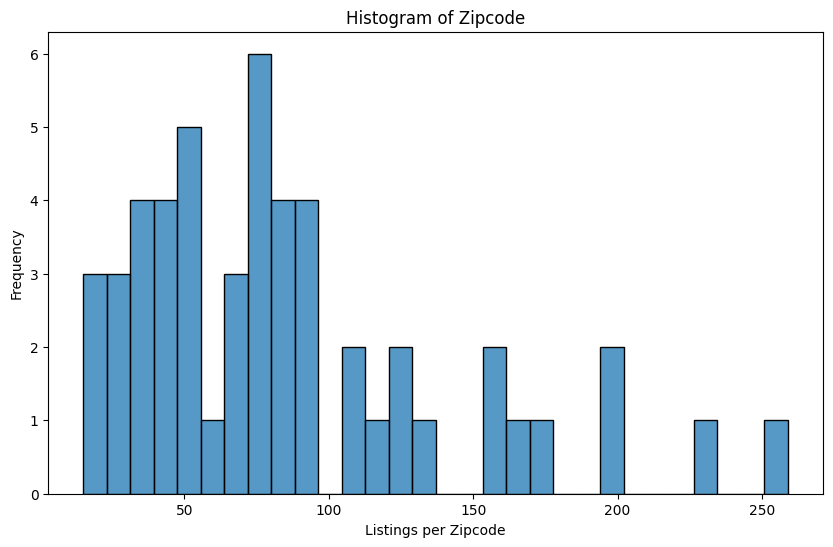

In [ ]:
counts_df = chicago_df.loc[~chicago_df.index.isin(outlier_zipcode)]['zipcode'].value_counts().reset_index()
counts_df.columns = ['zipcode', 'count']

plt.figure(figsize=(10, 6))
sns.histplot(counts_df['count'], bins=30)
plt.title(f"Histogram of Zipcode")
plt.xlabel('Listings per Zipcode')
plt.ylabel('Frequency')
plt.show()

## Description

### Length

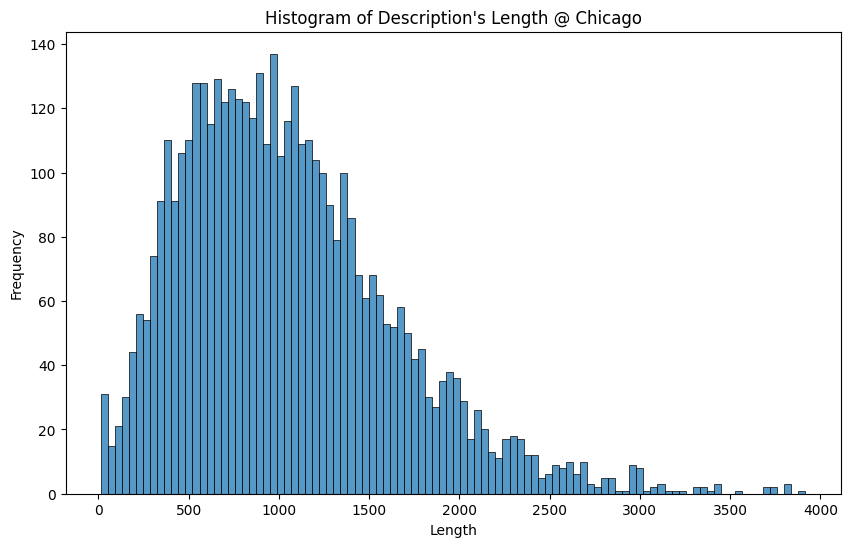

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(chicago_df['description'].str.len(), bins=100)
plt.title(f"Histogram of Description's Length @ Chicago")
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
lower_value = 50
upper_value = 3000

lower_percentile = percentileofscore(chicago_df['description'].str.len(), lower_value)
upper_percentile = percentileofscore(chicago_df['description'].str.len(), upper_value)

outlier_length = chicago_df[(chicago_df['description'].str.len() < lower_value)].index

print(f"Length: {lower_value}({lower_percentile:.2f}%)")
print(outlier_length)

Length: 50(0.65%)
Index([ 259,  472,  790,  953,  957, 1166, 1210, 2909, 3012, 4178, 4281, 4688,
       4916, 4952, 6100, 6311, 6399, 6482, 6836, 6911, 7147, 7292, 7580, 7676,
       7689, 7751, 7764, 7897, 8344],
      dtype='int64')


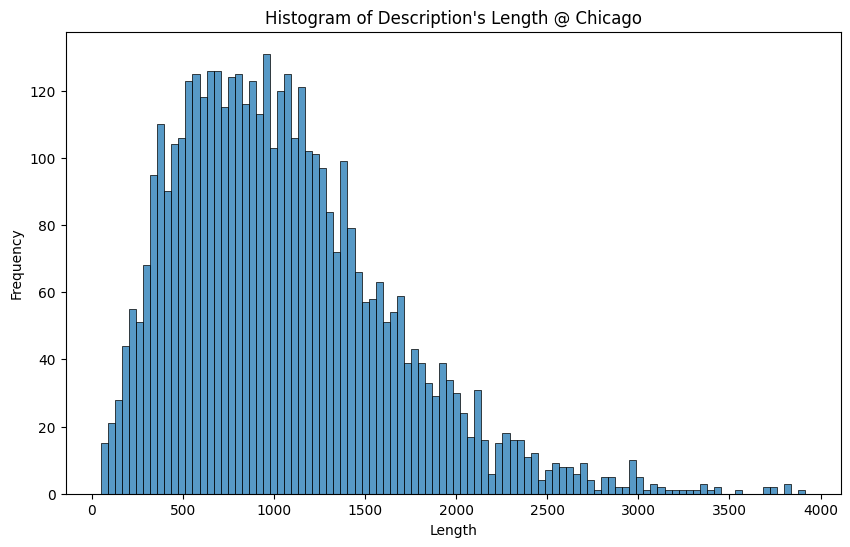

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(chicago_df.loc[~chicago_df.index.isin(outlier_length)]['description'].str.len(), bins=100)
plt.title(f"Histogram of Description's Length @ Chicago")
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

## House Attribute

### Parking

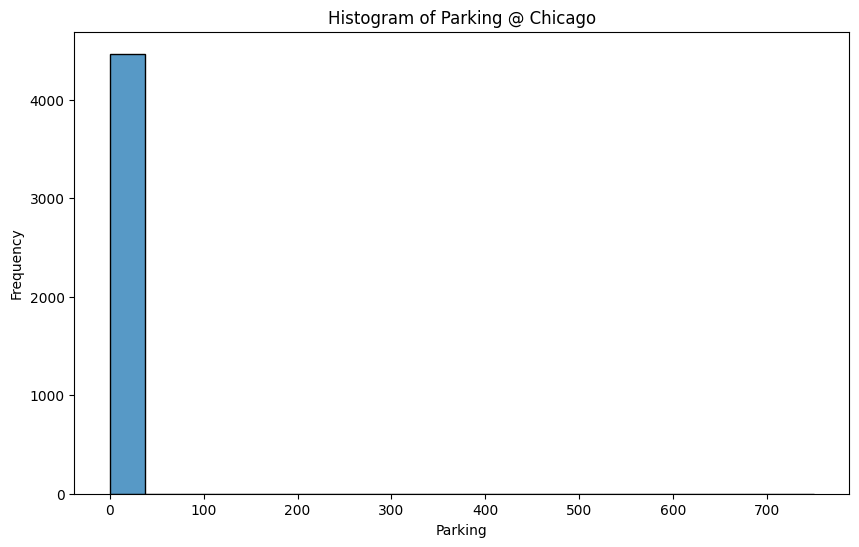

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(chicago_df['resoFacts.parkingCapacity'].astype(float), bins=20)
plt.title(f"Histogram of Parking @ Chicago")
plt.xlabel('Parking')
plt.ylabel('Frequency')
plt.show()

In [ ]:
lower_value = 0
upper_value = 5

lower_percentile = percentileofscore(chicago_df['resoFacts.parkingCapacity'].astype(float), lower_value)
upper_percentile = percentileofscore(chicago_df['resoFacts.parkingCapacity'].astype(float), upper_value)

outlier_parking = chicago_df[(chicago_df['resoFacts.parkingCapacity'].astype(float) > upper_value)].index

print(f"Parking: {upper_value}({upper_percentile:.2f}%)")
print(outlier_parking)

Parking: 5(99.34%)
Index([ 164,  216,  597,  746,  971, 1132, 1975, 2019, 2050, 2525, 2654, 2919,
       2920, 3212, 3388, 3435, 3517, 3608, 4079, 4592, 4661, 4880, 4895, 5983,
       6027, 6766, 8327],
      dtype='int64')


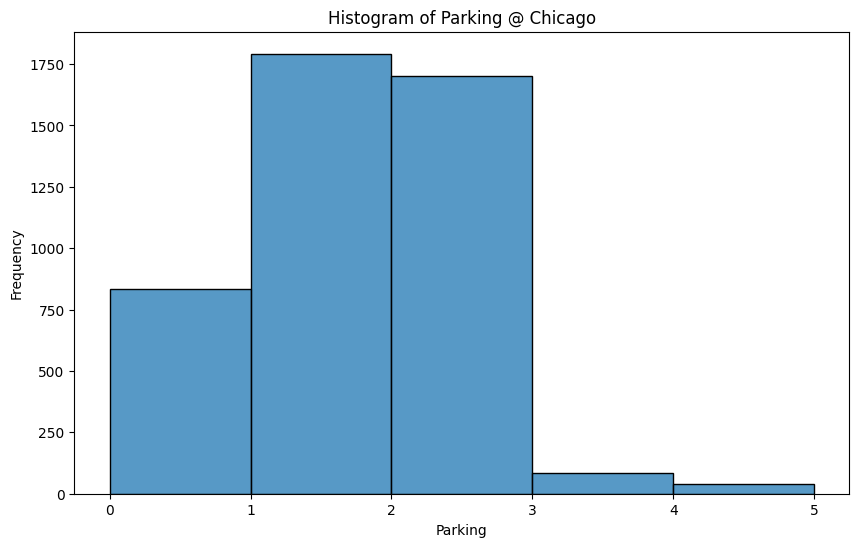

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(chicago_df.loc[~chicago_df.index.isin(outlier_parking)]['resoFacts.parkingCapacity'].astype(float), bins=5)
plt.title(f"Histogram of Parking @ Chicago")
plt.xlabel('Parking')
plt.ylabel('Frequency')
plt.show()

### Bathroom

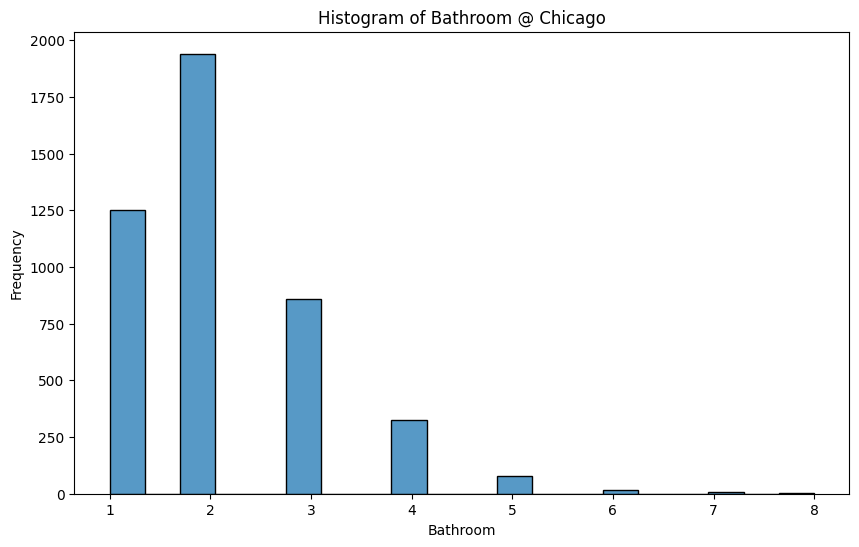

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(chicago_df['resoFacts.bathroomsFloat'].astype(float), bins=20)
plt.title(f"Histogram of Bathroom @ Chicago")
plt.xlabel('Bathroom')
plt.ylabel('Frequency')
plt.show()

In [ ]:
lower_value = 0
upper_value = 6

lower_percentile = percentileofscore(chicago_df['resoFacts.bathroomsFloat'].astype(float), lower_value)
upper_percentile = percentileofscore(chicago_df['resoFacts.bathroomsFloat'].astype(float), upper_value)

outlier_bathroom = chicago_df[(chicago_df['resoFacts.bathroomsFloat'].astype(float) <= lower_value) | (chicago_df['resoFacts.bathroomsFloat'].astype(float) > upper_value)].index

print(f"Bathroom: {upper_value}({upper_percentile:.2f}%)")
print(outlier_bathroom)

Bathroom: 6(99.63%)
Index([491, 1173, 1886, 3508, 3945, 5924, 6112, 7037], dtype='int64')


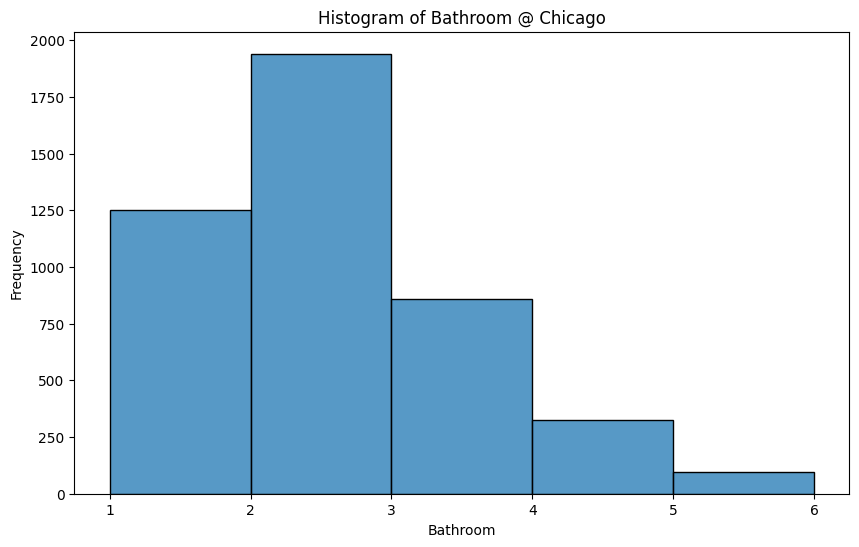

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(chicago_df.loc[~chicago_df.index.isin(outlier_bathroom)]['resoFacts.bathroomsFloat'].astype(float), bins=5)
plt.title(f"Histogram of Bathroom @ Chicago")
plt.xlabel('Bathroom')
plt.ylabel('Frequency')
plt.show()

### Bedroom

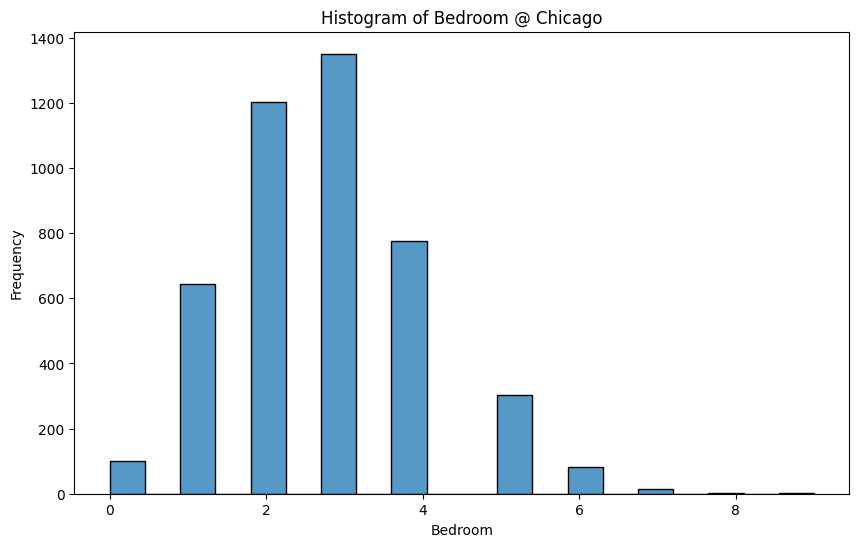

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(chicago_df['resoFacts.bedrooms'].astype(float), bins=20)
plt.title(f"Histogram of Bedroom @ Chicago")
plt.xlabel('Bedroom')
plt.ylabel('Frequency')
plt.show()

In [ ]:
lower_value = 0
upper_value = 6

lower_percentile = percentileofscore(chicago_df['resoFacts.bedrooms'].astype(float), lower_value)
upper_percentile = percentileofscore(chicago_df['resoFacts.bedrooms'].astype(float), upper_value)

outlier_bedroom = chicago_df[(chicago_df['resoFacts.bedrooms'].astype(float) > upper_value)].index

print(f"Bedroom: {upper_value}({upper_percentile:.2f}%)")
print(outlier_bedroom)

Bedroom: 6(98.73%)
Index([ 473,  625, 2188, 2636, 3048, 4197, 5149, 5892, 6027, 6323, 6869, 6980,
       7517, 7550, 8110, 8336],
      dtype='int64')


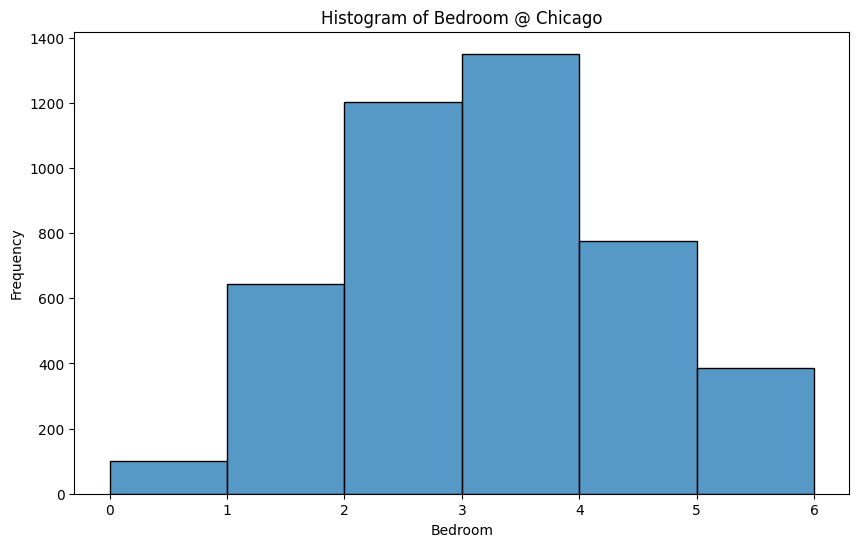

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(chicago_df.loc[~chicago_df.index.isin(outlier_bedroom)]['resoFacts.bedrooms'].astype(float), bins=6)
plt.title(f"Histogram of Bedroom @ Chicago")
plt.xlabel('Bedroom')
plt.ylabel('Frequency')
plt.show()

### Age

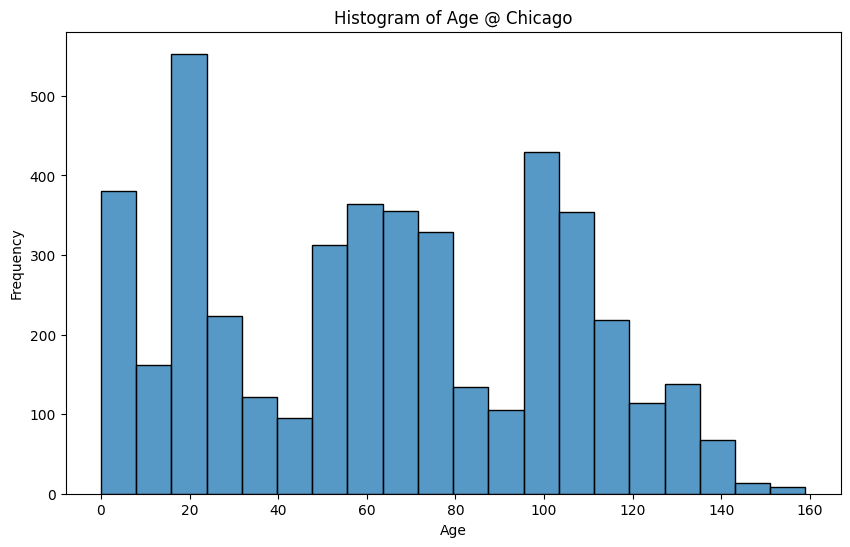

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(chicago_df['age'], bins=20)
plt.title(f"Histogram of Age @ Chicago")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
lower_value = 0
upper_value = 140

lower_percentile = percentileofscore(chicago_df['age'], lower_value)
upper_percentile = percentileofscore(chicago_df['age'], upper_value)

outlier_age = chicago_df[(chicago_df['age'] > upper_value)].index

print(f"Age: {lower_value}({lower_percentile:.2f}%) to {upper_value}({upper_percentile:.2f}%)")
print(outlier_age)

Age: 0(1.15%) to 140(99.35%)
Index([ 180,  473,  597,  668,  919, 1607, 1698, 1858, 1869, 1886, 1941, 1974,
       2061, 2563, 4161, 5014, 5548, 5605, 6539, 6661, 7032, 7127, 7771, 8018,
       8242, 8248, 8481],
      dtype='int64')


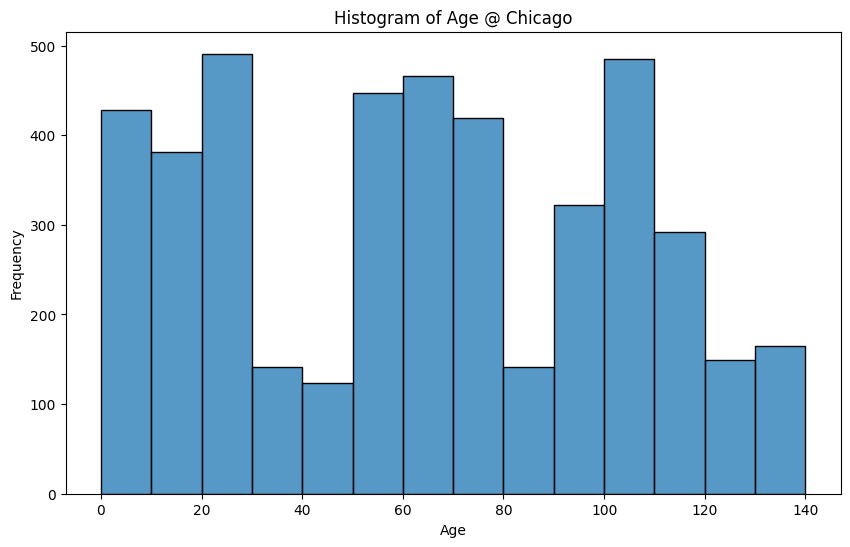

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(chicago_df.loc[~chicago_df.index.isin(outlier_age)]['age'], bins=14)
plt.title(f"Histogram of Age @ Chicago")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Living Area

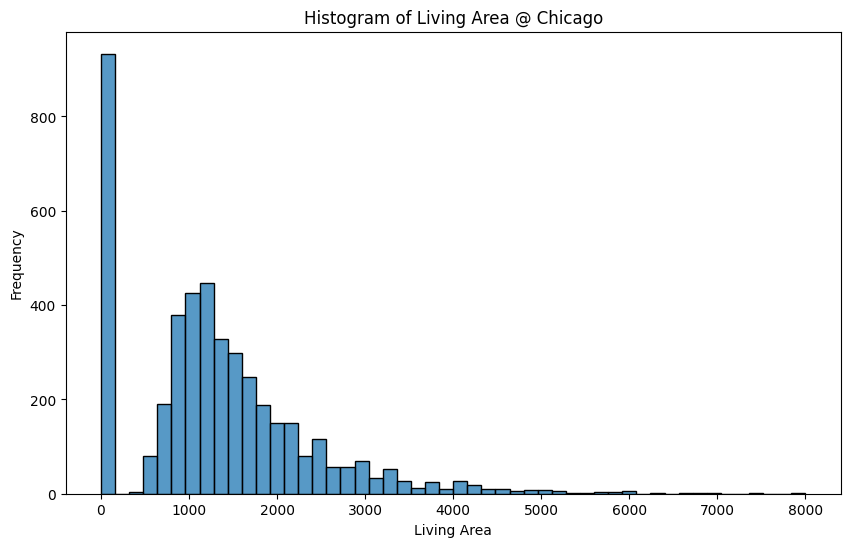

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(chicago_df['livingArea'].astype(float), bins=50)
plt.title(f"Histogram of Living Area @ Chicago")
plt.xlabel('Living Area')
plt.ylabel('Frequency')
plt.show()

In [ ]:
lower_value = 1 # not zero
upper_value = 5e3

lower_percentile = percentileofscore(chicago_df['livingArea'].astype(float), lower_value)
upper_percentile = percentileofscore(chicago_df['livingArea'].astype(float), upper_value)

outlier_livingArea = chicago_df[(chicago_df['livingArea'].astype(float) <= lower_value) | (chicago_df['livingArea'].astype(float) > upper_value)].index

print(f"Living Area: {lower_value}({lower_percentile:.2f}%) to {upper_value}({upper_percentile:.2f}%)")
print(outlier_livingArea)

Living Area: 1(20.84%) to 5000.0(99.30%)
Index([   9,   31,   35,   36,   37,   66,   77,   80,   91,   97,
       ...
       8358, 8369, 8372, 8404, 8406, 8411, 8452, 8461, 8499, 8507],
      dtype='int64', length=964)


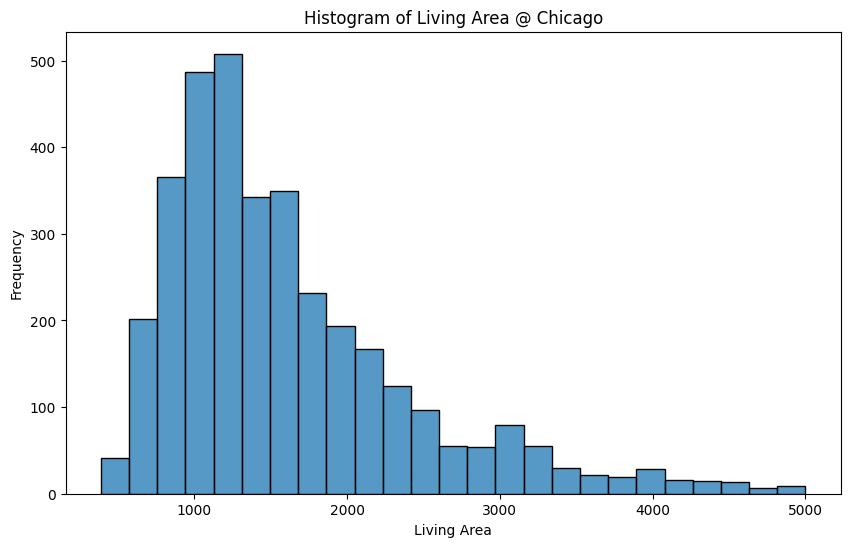

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(chicago_df.loc[~chicago_df.index.isin(outlier_livingArea)]['livingArea'].astype(float), bins=25)
plt.title(f"Histogram of Living Area @ Chicago")
plt.xlabel('Living Area')
plt.ylabel('Frequency')
plt.show()

## Drop

In [ ]:
print(f"{len(chicago_df)} Listings")

chicago_df = chicago_df.loc[~chicago_df.index.isin(outlier_price)]
print(f"Price: {len(chicago_df)} Listings")

chicago_df = chicago_df.loc[~chicago_df.index.isin(outlier_duration)]
print(f"Duration: {len(chicago_df)} Listings")

chicago_df = chicago_df.loc[~chicago_df.index.isin(outlier_zipcode)]
print(f"Zipcode: {len(chicago_df)} Listings")

chicago_df = chicago_df.loc[~chicago_df.index.isin(outlier_length)]
print(f"Desc) Length: {len(chicago_df)} Listings")

chicago_df = chicago_df.loc[~chicago_df.index.isin(outlier_parking)]
print(f"HA) Parking: {len(chicago_df)} Listings")

chicago_df = chicago_df.loc[~chicago_df.index.isin(outlier_bathroom)]
print(f"HA) Bathroom: {len(chicago_df)} Listings")

chicago_df = chicago_df.loc[~chicago_df.index.isin(outlier_bedroom)]
print(f"HA) Bedroom: {len(chicago_df)} Listings")

chicago_df = chicago_df.loc[~chicago_df.index.isin(outlier_age)]
print(f"HA) Age: {len(chicago_df)} Listings")

chicago_df = chicago_df.loc[~chicago_df.index.isin(outlier_livingArea)]
print(f"HA) Living Area: {len(chicago_df)} Listings")

4477 Listings
Price: 4402 Listings
Duration: 4354 Listings
Zipcode: 4303 Listings
Desc) Length: 4275 Listings
HA) Parking: 4248 Listings
HA) Bathroom: 4246 Listings
HA) Bedroom: 4232 Listings
HA) Age: 4211 Listings
HA) Living Area: 3315 Listings


# New York

In [ ]:
newyork_df = zillow_df[zillow_df['state'] == 'NY']

## Price

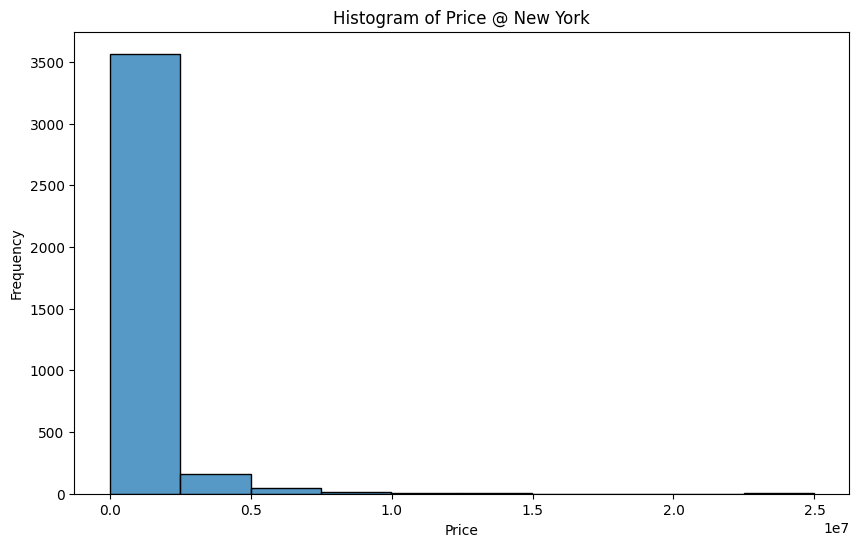

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(newyork_df['price'].astype(float), bins=10)
plt.title(f"Histogram of Price @ New York")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
lower_value = 1e5
upper_value = 7e6

lower_percentile = percentileofscore(newyork_df['price'].astype(float), lower_value)
upper_percentile = percentileofscore(newyork_df['price'].astype(float), upper_value)

outlier_price = newyork_df[(newyork_df['price'].astype(float) < lower_value) | (newyork_df['price'].astype(float) > upper_value)].index

print(f"Price: {lower_value}({lower_percentile:.2f}%) to {upper_value}({upper_percentile:.2f}%)")
print(outlier_price)

Price: 100000.0(0.40%) to 7000000.0(99.21%)
Index([14398, 14705, 14819, 14898, 14942, 15421, 15444, 15939, 16039, 16615,
       17134, 17178, 17274, 17382, 18897, 18982, 19181, 19732, 19851, 19870,
       19982, 20157, 20667, 20679, 20726, 21187, 21225, 21529, 21693, 21829,
       22371, 22575, 22783, 22886, 23194, 23247, 23910, 23998, 24093, 24596,
       24732, 24751, 24971, 25122],
      dtype='int64')


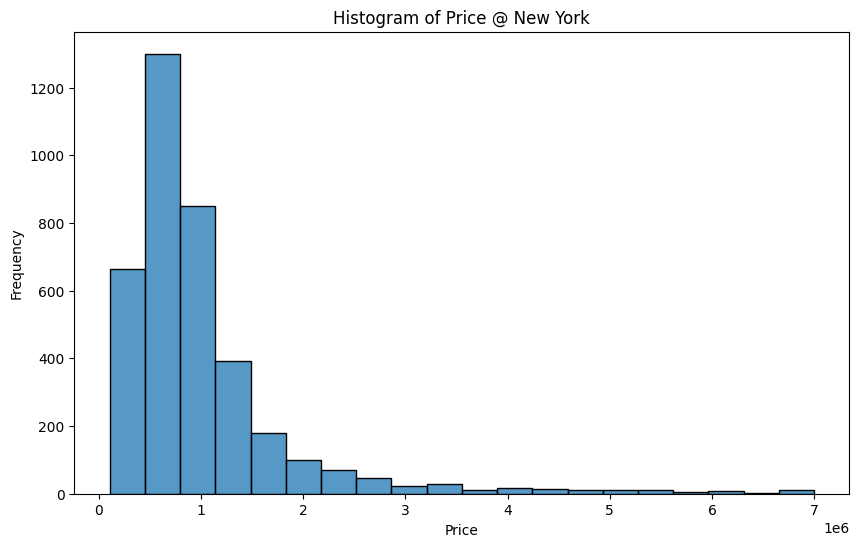

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(newyork_df.loc[~newyork_df.index.isin(outlier_price)]['price'].astype(float), bins=20)
plt.title(f"Histogram of Price @ New York")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

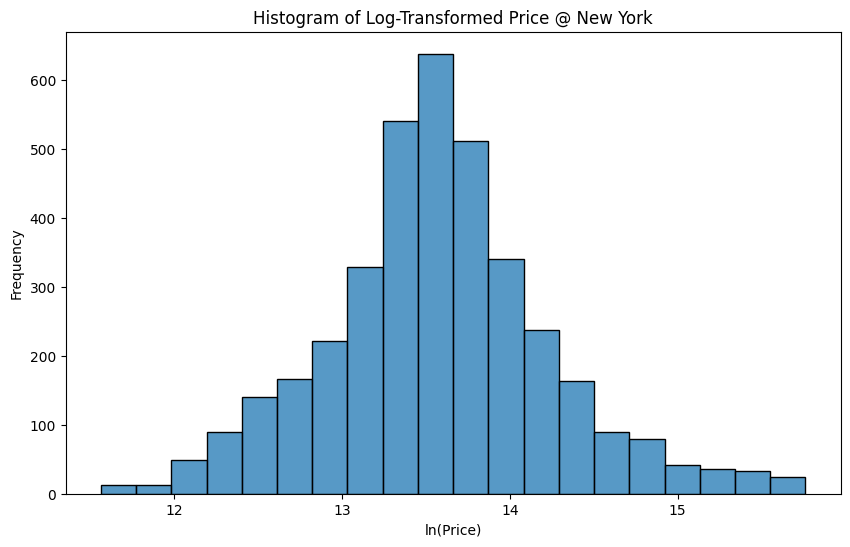

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log(newyork_df.loc[~newyork_df.index.isin(outlier_price)]['price'].astype(float)), bins=20)
plt.title(f"Histogram of Log-Transformed Price @ New York")
plt.xlabel('ln(Price)')
plt.ylabel('Frequency')
plt.show()

## Duration

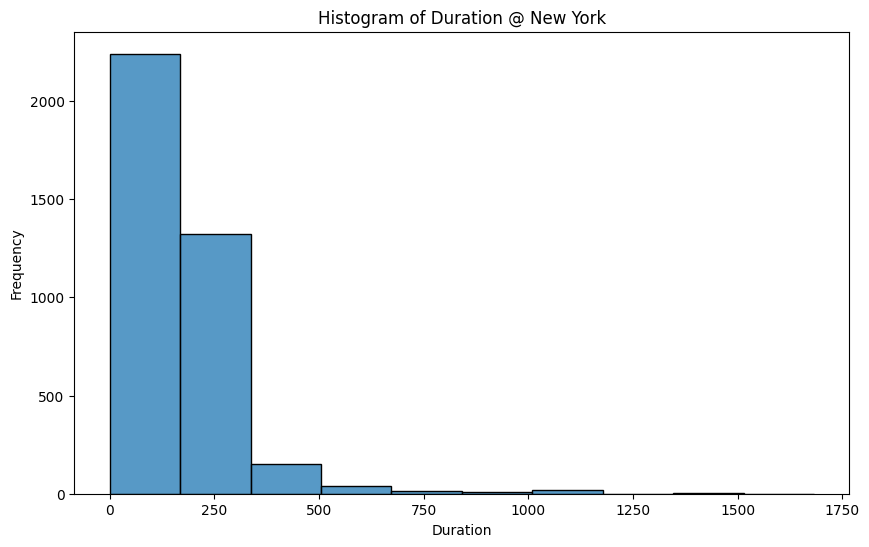

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(newyork_df['duration'].astype(float), bins=10)
plt.title(f"Histogram of Duration @ New York")
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

In [ ]:
lower_value = 0
upper_value = 365 # 730 (99%)

lower_percentile = percentileofscore(newyork_df['duration'].astype(float), lower_value)
upper_percentile = percentileofscore(newyork_df['duration'].astype(float), upper_value)

outlier_duration = newyork_df[(newyork_df['duration'].astype(float) > upper_value)].index

print(f"Duration: {upper_value}({upper_percentile:.2f}%)")
print(outlier_duration)

Duration: 365(94.96%)
Index([14619, 14629, 14665, 14673, 14749, 14819, 14904, 14942, 15032, 15087,
       ...
       24777, 24781, 24927, 25016, 25052, 25132, 25153, 25361, 25490, 25502],
      dtype='int64', length=191)


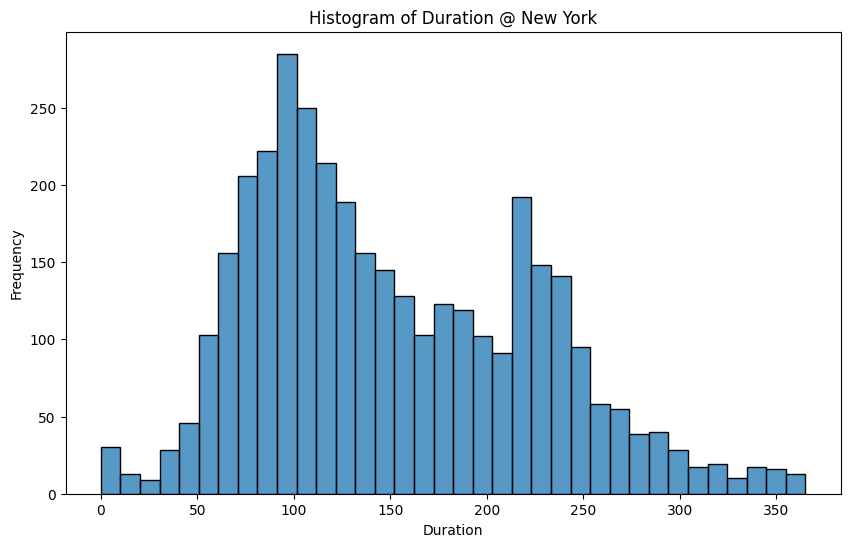

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(newyork_df.loc[~newyork_df.index.isin(outlier_duration)]['duration'], bins=36)
plt.title(f"Histogram of Duration @ New York")
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


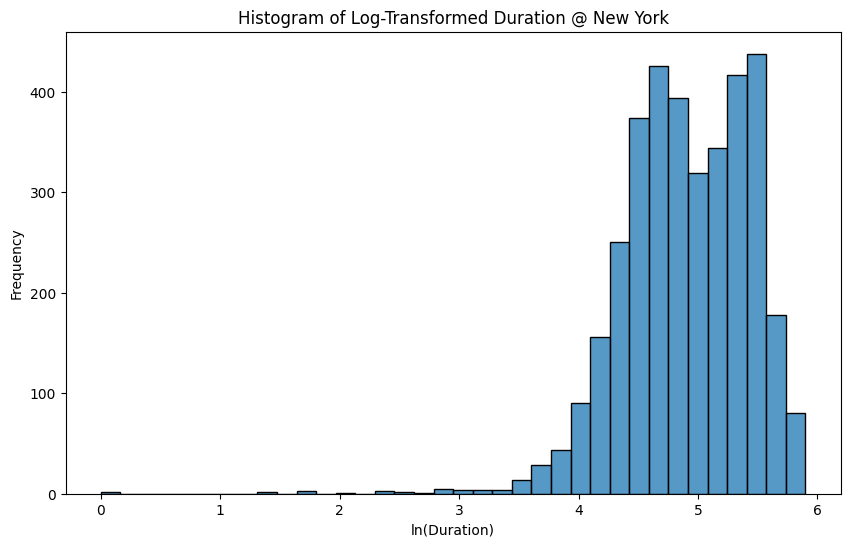

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log(newyork_df.loc[~newyork_df.index.isin(outlier_duration)]['duration']), bins=36)
plt.title(f"Histogram of Log-Transformed Duration @ New York")
plt.xlabel('ln(Duration)')
plt.ylabel('Frequency')
plt.show()

## Zipcode

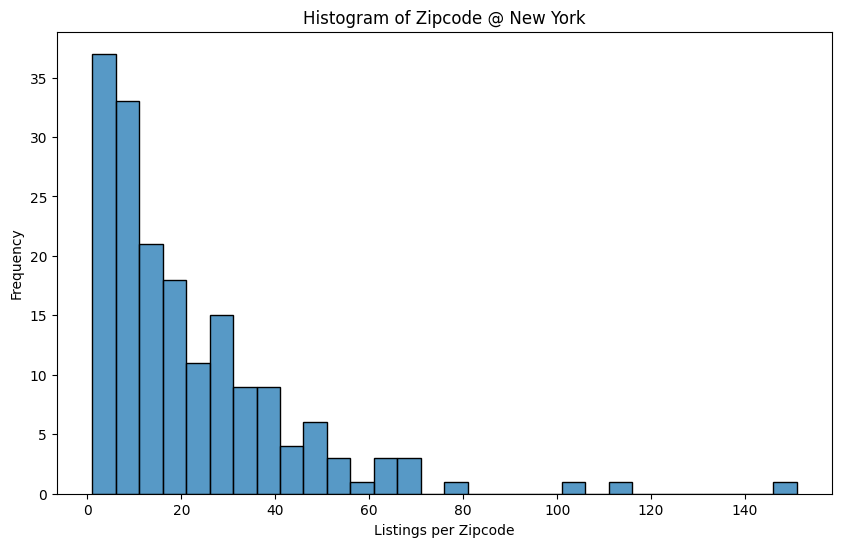

In [ ]:
counts_df = newyork_df['zipcode'].value_counts().reset_index()
counts_df.columns = ['zipcode', 'count']

plt.figure(figsize=(10, 6))
sns.histplot(counts_df['count'], bins=30)
plt.title(f"Histogram of Zipcode @ New York")
plt.xlabel('Listings per Zipcode')
plt.ylabel('Frequency')
plt.show()

In [ ]:
lower_value = 5
outlier_zipcode = newyork_df[newyork_df['zipcode'].isin(counts_df[counts_df['count'] < lower_value]['zipcode'])].index
print(f"Houses in zipcodes with less than {lower_value} listings @ Chicago: {len(outlier_zipcode)}({100*len(outlier_zipcode)/newyork_df.shape[0]:.2f}%)")
print(outlier_zipcode)

Houses in zipcodes with less than 5 listings @ Chicago: 82(2.16%)
Index([14484, 14614, 14665, 15036, 15353, 15405, 15609, 15610, 15617, 15697,
       15741, 15743, 15851, 15889, 15915, 16130, 16147, 16313, 16405, 16579,
       16628, 16829, 17042, 17078, 17187, 17312, 17338, 17382, 17460, 17496,
       17713, 17799, 17960, 18125, 18495, 18591, 18711, 18731, 18771, 18778,
       18933, 19074, 19105, 19162, 19517, 19989, 20138, 20238, 20368, 20727,
       20933, 21210, 21410, 21481, 21507, 21588, 21602, 21611, 21654, 21941,
       22087, 22202, 22252, 22723, 22813, 22891, 22941, 22945, 23238, 23457,
       23600, 23900, 24108, 24315, 24626, 24680, 24704, 24868, 25257, 25260,
       25397, 25441],
      dtype='int64')


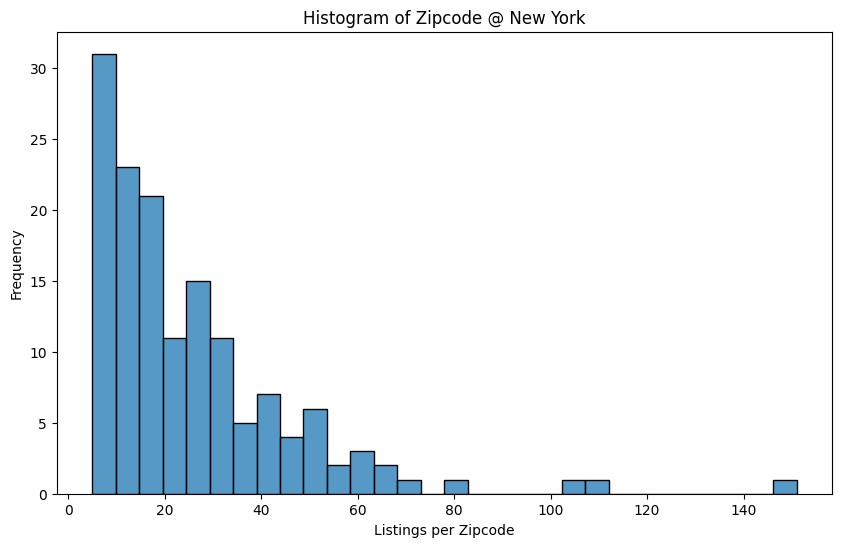

In [ ]:
counts_df = newyork_df.loc[~newyork_df.index.isin(outlier_zipcode)]['zipcode'].value_counts().reset_index()
counts_df.columns = ['zipcode', 'count']

plt.figure(figsize=(10, 6))
sns.histplot(counts_df['count'], bins=30)
plt.title(f"Histogram of Zipcode @ New York")
plt.xlabel('Listings per Zipcode')
plt.ylabel('Frequency')
plt.show()

## Description

### Length

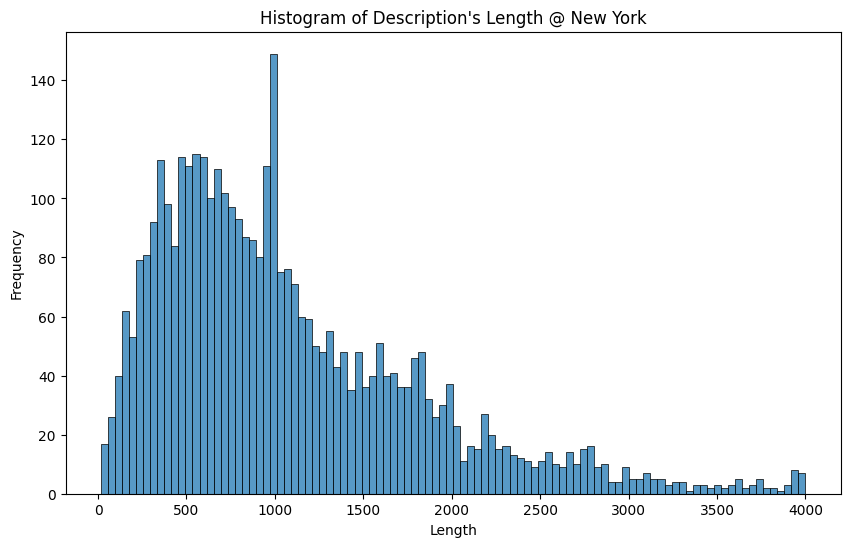

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(newyork_df['description'].str.len(), bins=100)
plt.title(f"Histogram of Description's Length @ New York")
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
lower_value = 50
upper_value = 3500

lower_percentile = percentileofscore(newyork_df['description'].str.len(), lower_value)
upper_percentile = percentileofscore(newyork_df['description'].str.len(), upper_value)

outlier_length = newyork_df[(newyork_df['description'].str.len() < lower_value)].index

print(f"Length: {lower_value}({lower_percentile:.2f}%)")
print(outlier_length)

Length: 50(0.45%)
Index([14677, 14691, 14993, 15527, 17265, 17471, 21471, 21740, 21898, 22711,
       23121, 24206, 24429, 24580, 25168, 25256],
      dtype='int64')


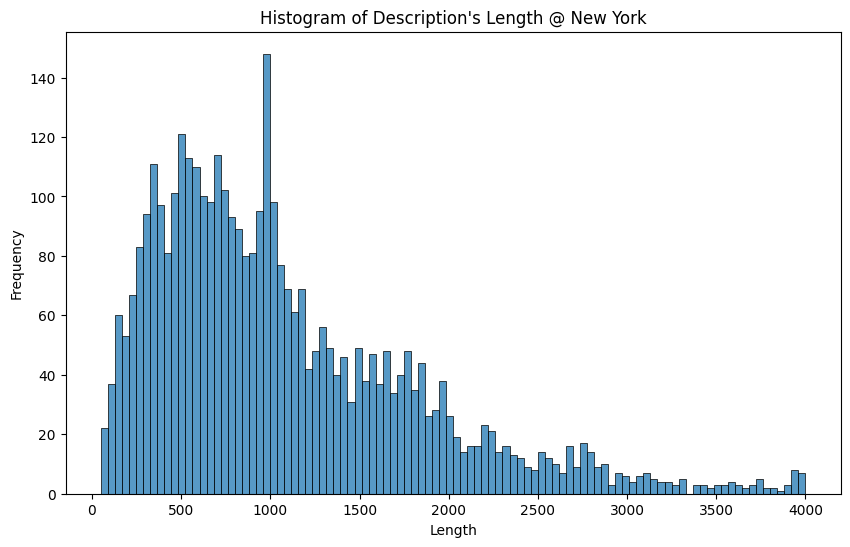

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(newyork_df.loc[~newyork_df.index.isin(outlier_length)]['description'].str.len(), bins=100)
plt.title(f"Histogram of Description's Length @ New York")
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

## House Attribute

### Parking

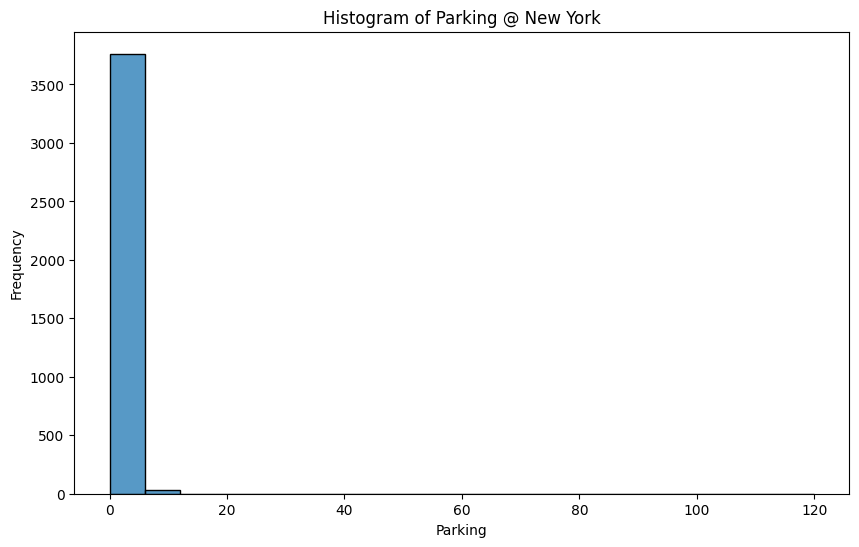

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(newyork_df['resoFacts.parkingCapacity'].astype(float), bins=20)
plt.title(f"Histogram of Parking @ New York")
plt.xlabel('Parking')
plt.ylabel('Frequency')
plt.show()

In [ ]:
lower_value = 0
upper_value = 5

lower_percentile = percentileofscore(newyork_df['resoFacts.parkingCapacity'].astype(float), lower_value)
upper_percentile = percentileofscore(newyork_df['resoFacts.parkingCapacity'].astype(float), upper_value)

outlier_parking = newyork_df[(newyork_df['resoFacts.parkingCapacity'].astype(float) > upper_value)].index

print(f"Parking: {upper_value}({upper_percentile:.2f}%)")
print(outlier_parking)

Parking: 5(98.92%)
Index([14469, 14543, 14795, 14866, 14906, 14980, 15354, 15555, 15765, 16119,
       16473, 16735, 17048, 17538, 17699, 17946, 18319, 18381, 18955, 19412,
       20026, 20219, 20330, 20682, 20986, 21051, 21238, 21448, 22550, 22733,
       22910, 23902, 24000, 24647],
      dtype='int64')


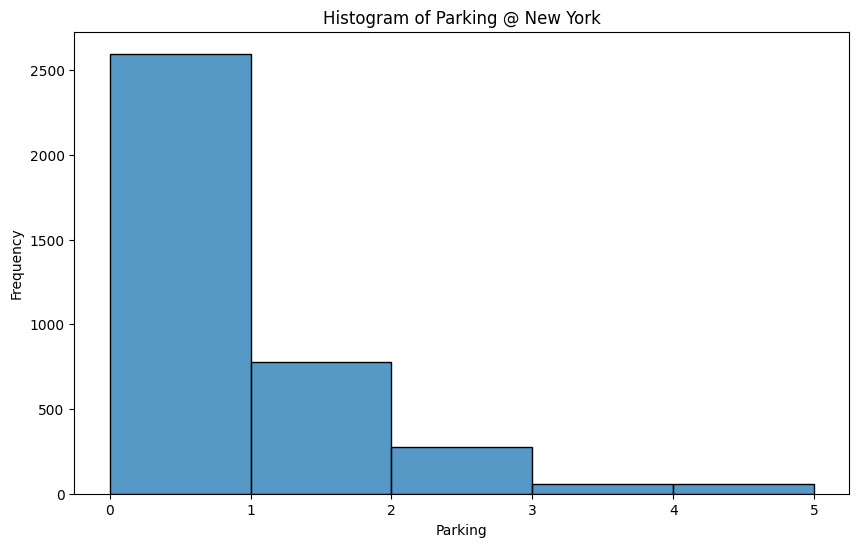

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(newyork_df.loc[~newyork_df.index.isin(outlier_parking)]['resoFacts.parkingCapacity'].astype(float), bins=5)
plt.title(f"Histogram of Parking @ New York")
plt.xlabel('Parking')
plt.ylabel('Frequency')
plt.show()

### Bathroom

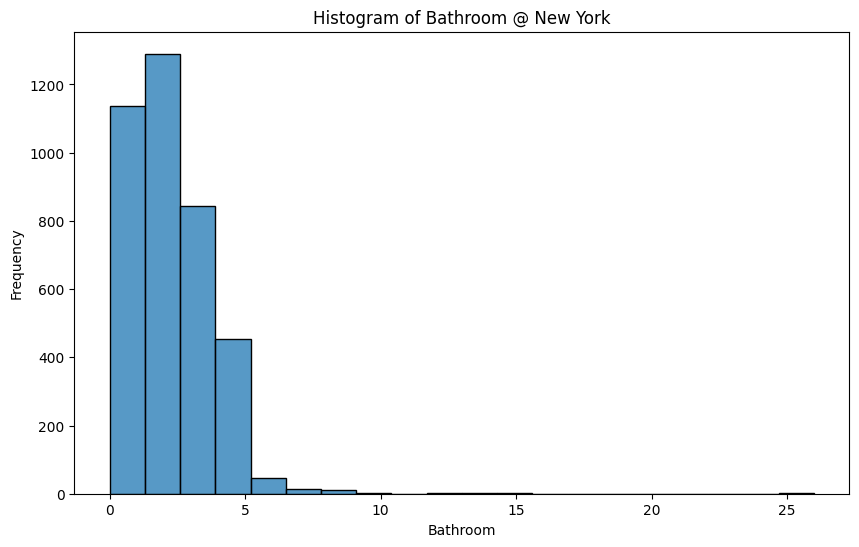

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(newyork_df['resoFacts.bathroomsFloat'].astype(float), bins=20)
plt.title(f"Histogram of Bathroom @ New York")
plt.xlabel('Bathroom')
plt.ylabel('Frequency')
plt.show()

In [ ]:
lower_value = 0
upper_value = 6

lower_percentile = percentileofscore(newyork_df['resoFacts.bathroomsFloat'].astype(float), lower_value)
upper_percentile = percentileofscore(newyork_df['resoFacts.bathroomsFloat'].astype(float), upper_value)

outlier_bathroom = newyork_df[(newyork_df['resoFacts.bathroomsFloat'].astype(float) <= lower_value) | (newyork_df['resoFacts.bathroomsFloat'].astype(float) > upper_value)].index

print(f"Bathroom: {upper_value}({upper_percentile:.2f}%)")
print(outlier_bathroom)

Bathroom: 6(98.66%)
Index([14898, 15403, 15727, 16163, 16313, 16336, 17134, 17178, 17600, 18128,
       18795, 19181, 19917, 20707, 20726, 21665, 21759, 21765, 21936, 22127,
       22480, 22550, 23199, 23328, 23985, 23998, 24186, 24827, 25033, 25122],
      dtype='int64')


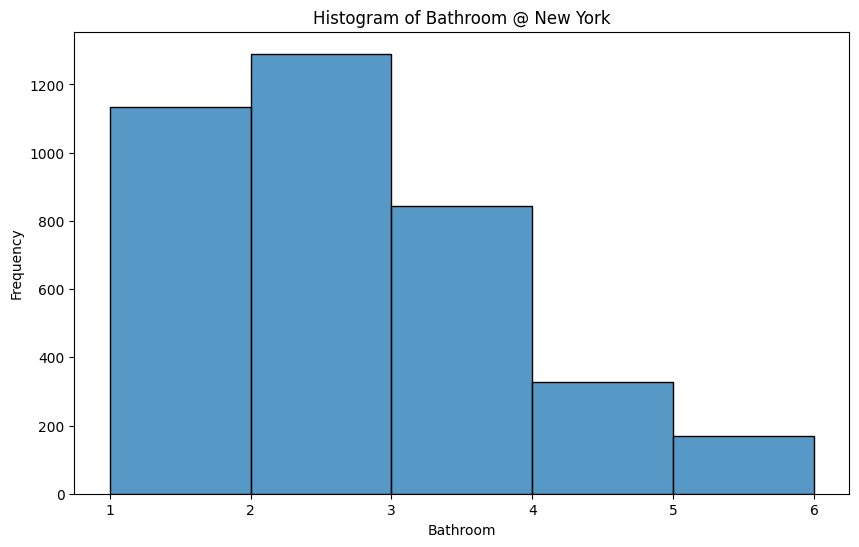

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(newyork_df.loc[~newyork_df.index.isin(outlier_bathroom)]['resoFacts.bathroomsFloat'].astype(float), bins=5)
plt.title(f"Histogram of Bathroom @ New York")
plt.xlabel('Bathroom')
plt.ylabel('Frequency')
plt.show()

### Bedroom

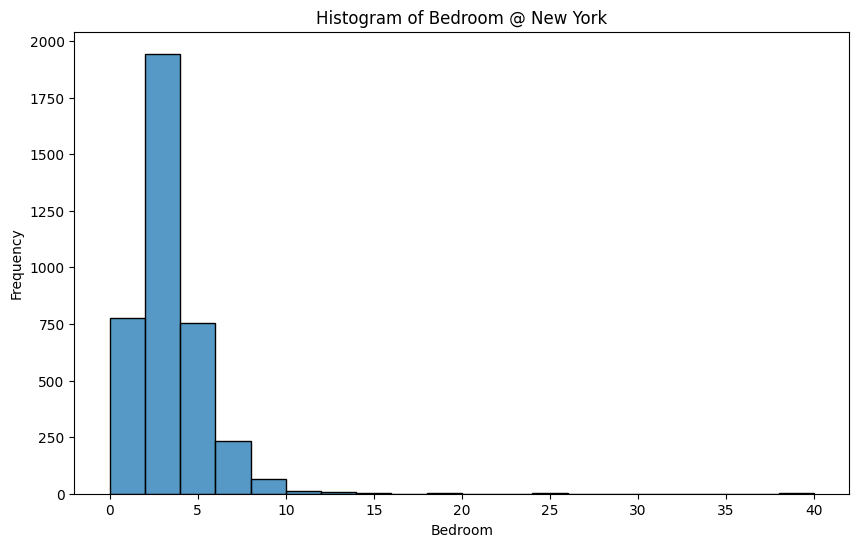

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(newyork_df['resoFacts.bedrooms'].astype(float), bins=20)
plt.title(f"Histogram of Bedroom @ New York")
plt.xlabel('Bedroom')
plt.ylabel('Frequency')
plt.show()

In [ ]:
lower_value = 0
upper_value = 9

lower_percentile = percentileofscore(newyork_df['resoFacts.bedrooms'].astype(float), lower_value)
upper_percentile = percentileofscore(newyork_df['resoFacts.bedrooms'].astype(float), upper_value)

outlier_bedroom = newyork_df[(newyork_df['resoFacts.bedrooms'].astype(float) > upper_value)].index

print(f"Bedroom: {upper_value}({upper_percentile:.2f}%)")
print(outlier_bedroom)

Bedroom: 9(98.99%)
Index([14922, 15403, 16163, 16313, 16340, 17600, 17790, 17833, 18795, 19251,
       19506, 19598, 19917, 20062, 20738, 20855, 20986, 21759, 22127, 22480,
       22546, 22583, 22652, 23123, 23284, 23385, 25027],
      dtype='int64')


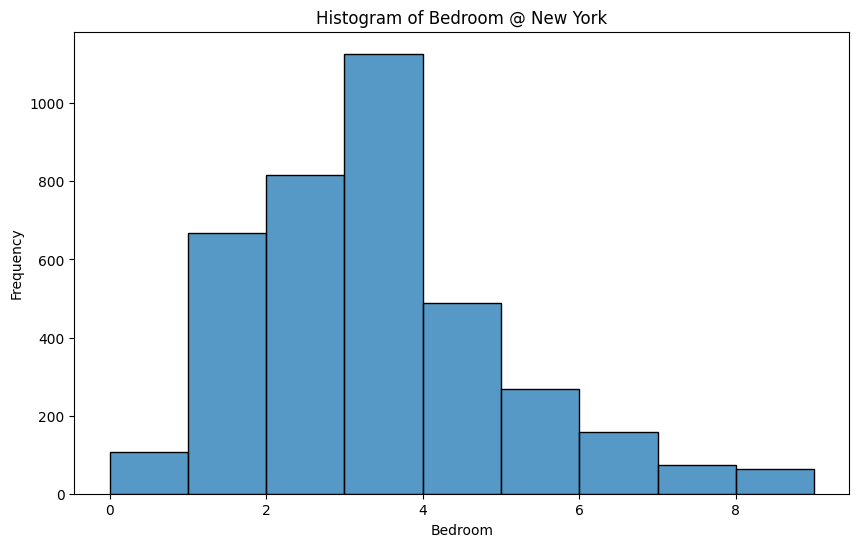

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(newyork_df.loc[~newyork_df.index.isin(outlier_bedroom)]['resoFacts.bedrooms'].astype(float), bins=9)
plt.title(f"Histogram of Bedroom @ New York")
plt.xlabel('Bedroom')
plt.ylabel('Frequency')
plt.show()

### Age

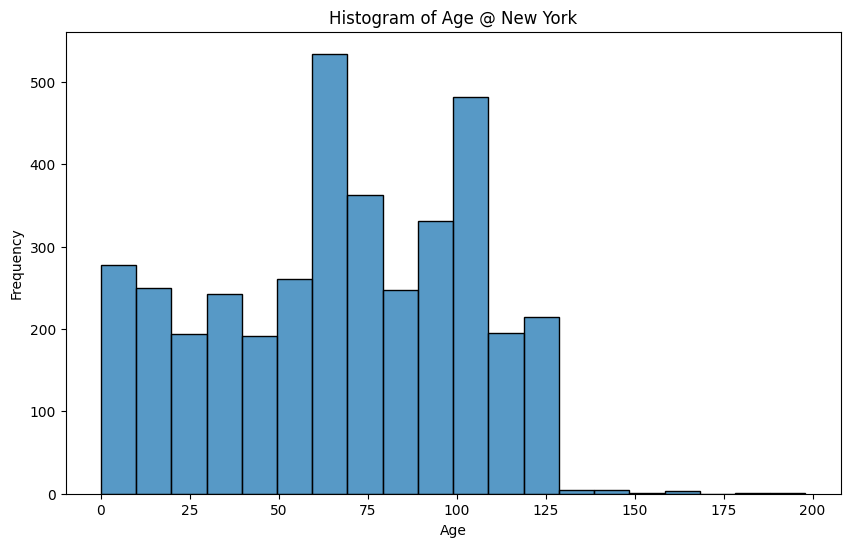

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(newyork_df['age'], bins=20)
plt.title(f"Histogram of Age @ New York")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
lower_value = 0
upper_value = 125

lower_percentile = percentileofscore(newyork_df['age'], lower_value)
upper_percentile = percentileofscore(newyork_df['age'], upper_value)

outlier_age = newyork_df[(newyork_df['age'] > upper_value)].index

print(f"Age: {lower_value}({lower_percentile:.2f}%) to {upper_value}({upper_percentile:.2f}%)")
print(outlier_age)

Age: 0(0.11%) to 125(98.53%)
Index([14467, 14691, 14705, 15151, 15444, 16292, 16428, 17612, 18432, 18563,
       19032, 19672, 19870, 22958, 24186, 24411, 24484, 24868],
      dtype='int64')


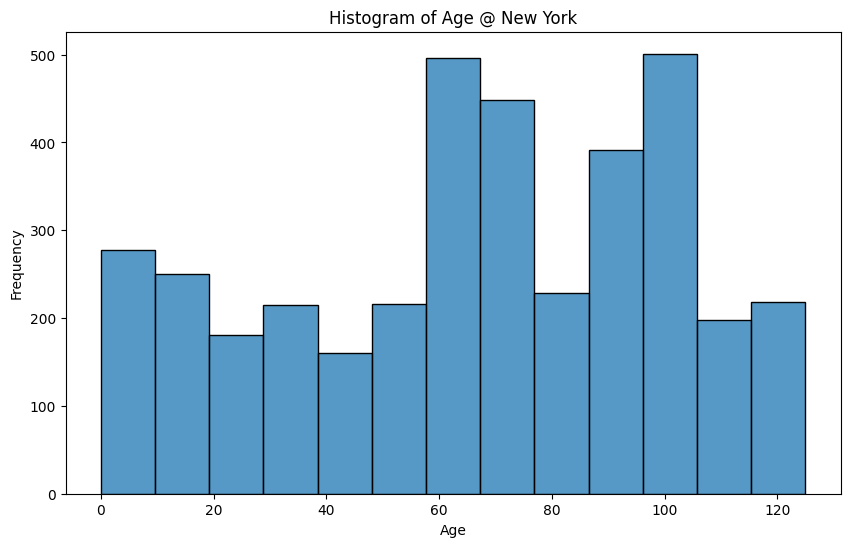

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(newyork_df.loc[~newyork_df.index.isin(outlier_age)]['age'], bins=13)
plt.title(f"Histogram of Age @ New York")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Living Area

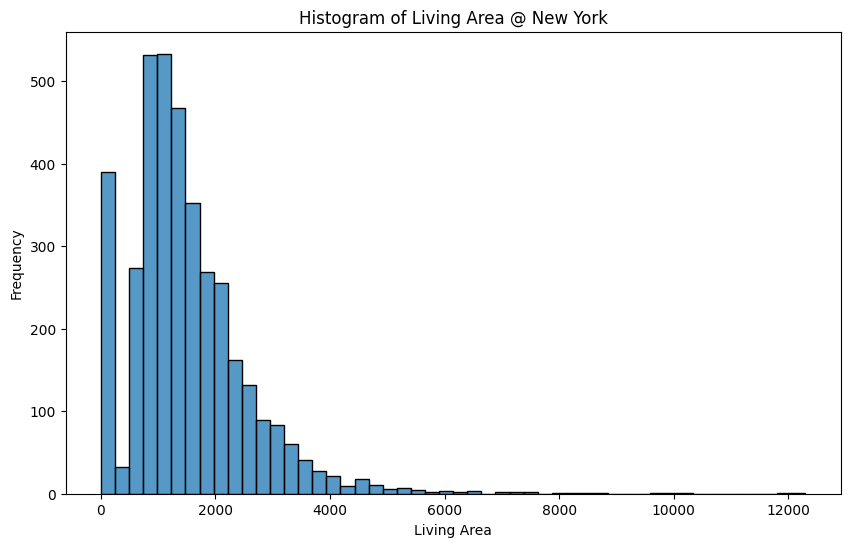

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(newyork_df['livingArea'].astype(float), bins=50)
plt.title(f"Histogram of Living Area @ New York")
plt.xlabel('Living Area')
plt.ylabel('Frequency')
plt.show()

In [ ]:
lower_value = 0
upper_value = 5e3

lower_percentile = percentileofscore(newyork_df['livingArea'].astype(float), lower_value)
upper_percentile = percentileofscore(newyork_df['livingArea'].astype(float), upper_value)

outlier_livingArea = newyork_df[(newyork_df['livingArea'].astype(float) <= lower_value) | (newyork_df['livingArea'].astype(float) > upper_value)].index

print(f"Living Area: {lower_value}({lower_percentile:.2f}%) to {upper_value}({upper_percentile:.2f}%)")
print(outlier_livingArea)

Living Area: 0(5.14%) to 5000.0(98.96%)
Index([14390, 14394, 14422, 14467, 14601, 14616, 14647, 14691, 14702, 14703,
       ...
       25201, 25269, 25284, 25323, 25355, 25385, 25470, 25488, 25505, 25510],
      dtype='int64', length=428)


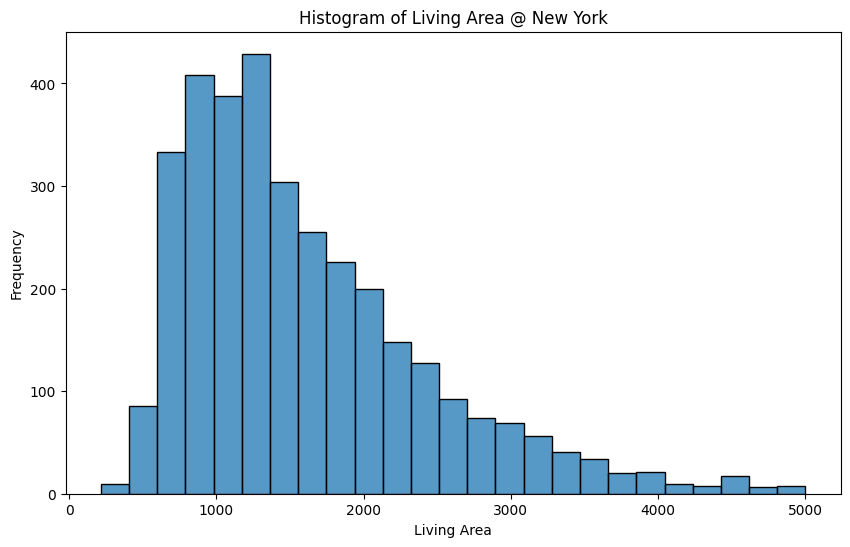

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(newyork_df.loc[~newyork_df.index.isin(outlier_livingArea)]['livingArea'].astype(float), bins=25)
plt.title(f"Histogram of Living Area @ New York")
plt.xlabel('Living Area')
plt.ylabel('Frequency')
plt.show()

## Drop

In [ ]:
print(f"{len(newyork_df)} Listings")

newyork_df = newyork_df.loc[~newyork_df.index.isin(outlier_price)]
print(f"Price: {len(newyork_df)} Listings")

newyork_df = newyork_df.loc[~newyork_df.index.isin(outlier_duration)]
print(f"Duration: {len(newyork_df)} Listings")

newyork_df = newyork_df.loc[~newyork_df.index.isin(outlier_zipcode)]
print(f"Zipcode: {len(newyork_df)} Listings")

newyork_df = newyork_df.loc[~newyork_df.index.isin(outlier_length)]
print(f"Desc) Length: {len(newyork_df)} Listings")

newyork_df = newyork_df.loc[~newyork_df.index.isin(outlier_parking)]
print(f"HA) Parking: {len(newyork_df)} Listings")

newyork_df = newyork_df.loc[~newyork_df.index.isin(outlier_bathroom)]
print(f"HA) Bathroom: {len(newyork_df)} Listings")

newyork_df = newyork_df.loc[~newyork_df.index.isin(outlier_bedroom)]
print(f"HA) Bedroom: {len(newyork_df)} Listings")

newyork_df = newyork_df.loc[~newyork_df.index.isin(outlier_age)]
print(f"HA) Age: {len(newyork_df)} Listings")

newyork_df = newyork_df.loc[~newyork_df.index.isin(outlier_livingArea)]
print(f"HA) Living Area: {len(newyork_df)} Listings")

3797 Listings
Price: 3753 Listings
Duration: 3567 Listings
Zipcode: 3492 Listings
Desc) Length: 3477 Listings
HA) Parking: 3444 Listings
HA) Bathroom: 3427 Listings
HA) Bedroom: 3410 Listings
HA) Age: 3398 Listings
HA) Living Area: 3020 Listings


# Los Angeles

In [ ]:
losangeles_df = zillow_df[zillow_df['state'] == 'CA']

## Price

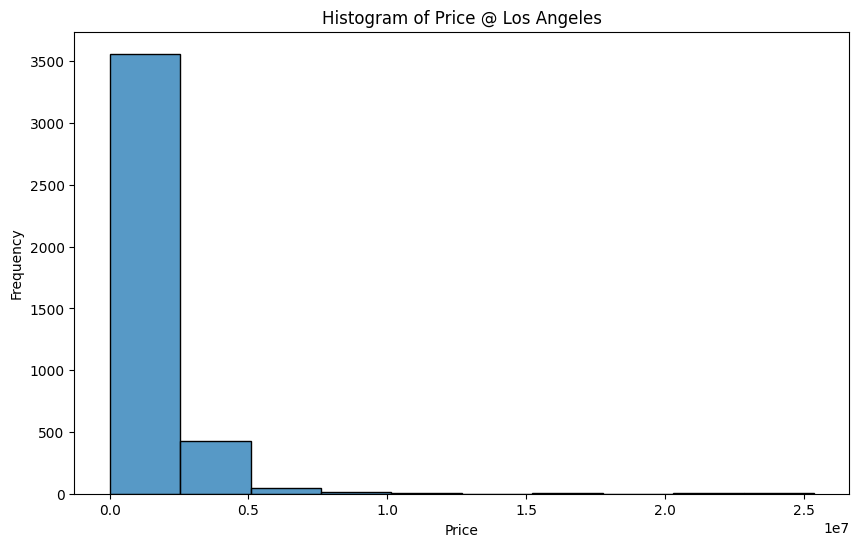

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(losangeles_df['price'].astype(float), bins=10)
plt.title(f"Histogram of Price @ Los Angeles")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
lower_value = 3e5
upper_value = 1e7

lower_percentile = percentileofscore(losangeles_df['price'].astype(float), lower_value)
upper_percentile = percentileofscore(losangeles_df['price'].astype(float), upper_value)

outlier_price = losangeles_df[(losangeles_df['price'].astype(float) < lower_value) | (losangeles_df['price'].astype(float) > upper_value)].index

print(f"Price: {lower_value}({lower_percentile:.2f}%) to {upper_value}({upper_percentile:.2f}%)")
print(outlier_price)

Price: 300000.0(0.87%) to 10000000.0(99.63%)
Index([ 8555,  8567,  8729,  8735,  8784,  8966,  8967,  9017,  9061,  9114,
        9190,  9290,  9521,  9607,  9684, 10022, 10199, 10223, 10393, 10596,
       10792, 10895, 11189, 11195, 11474, 11502, 11953, 12043, 12258, 12324,
       12427, 12567, 12571, 12801, 12818, 12837, 12956, 13018, 13188, 13211,
       13332, 13342, 13779, 13927, 14041, 14059, 14109, 14200, 14291],
      dtype='int64')


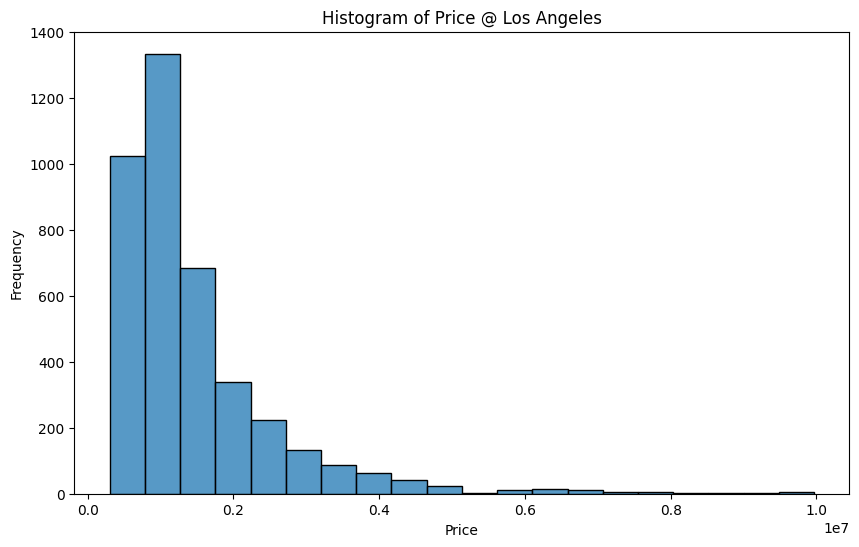

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(losangeles_df.loc[~losangeles_df.index.isin(outlier_price)]['price'].astype(float), bins=20)
plt.title(f"Histogram of Price @ Los Angeles")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

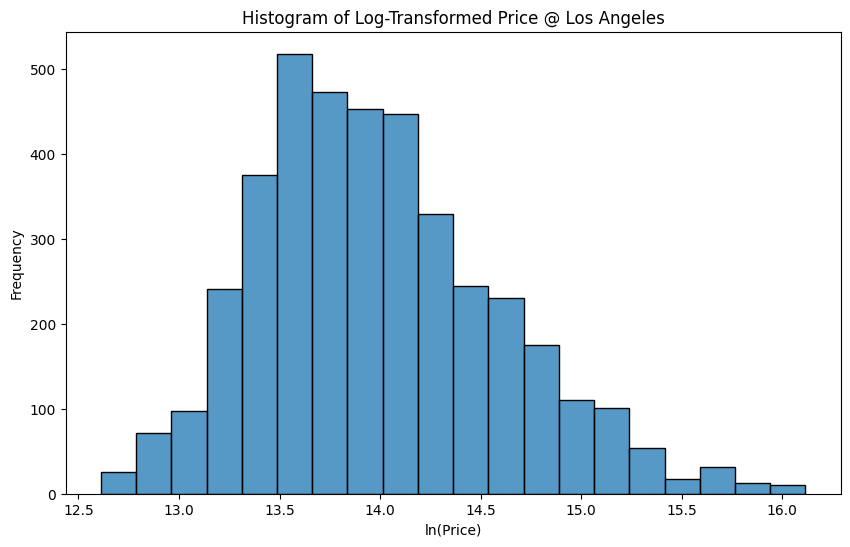

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log(losangeles_df.loc[~losangeles_df.index.isin(outlier_price)]['price'].astype(float)), bins=20)
plt.title(f"Histogram of Log-Transformed Price @ Los Angeles")
plt.xlabel('ln(Price)')
plt.ylabel('Frequency')
plt.show()

## Duration

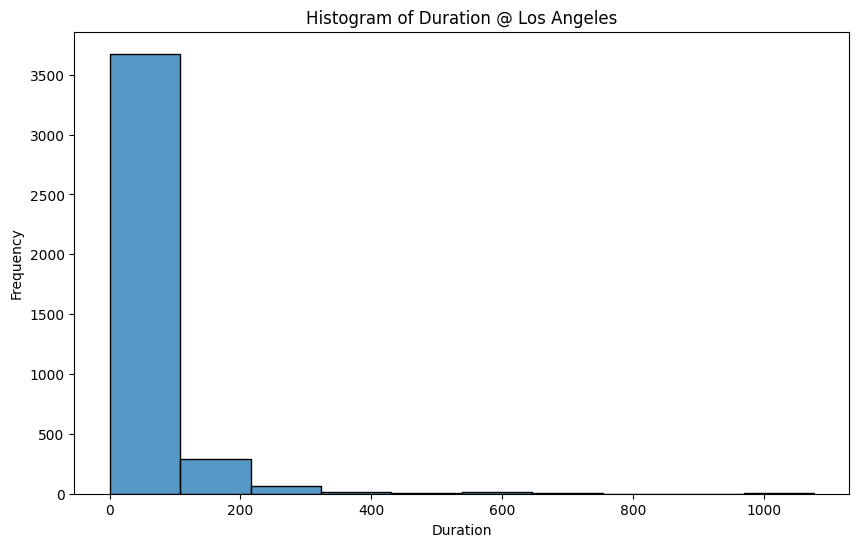

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(losangeles_df['duration'].astype(float), bins=10)
plt.title(f"Histogram of Duration @ Los Angeles")
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

In [ ]:
lower_value = 0
upper_value = 365

lower_percentile = percentileofscore(losangeles_df['duration'].astype(float), lower_value)
upper_percentile = percentileofscore(losangeles_df['duration'].astype(float), upper_value)

outlier_duration = losangeles_df[(losangeles_df['duration'].astype(float) > upper_value)].index

print(f"Duration: {upper_value}({upper_percentile:.2f}%)")
print(outlier_duration)

Duration: 365(99.21%)
Index([ 8534,  8800,  9075,  9502,  9563,  9607,  9804,  9948,  9973, 10717,
       10968, 10973, 11321, 11575, 12149, 12457, 12718, 12741, 12777, 12874,
       12980, 13010, 13161, 13183, 13503, 13504, 13779, 13824, 13927, 14041,
       14111, 14200],
      dtype='int64')


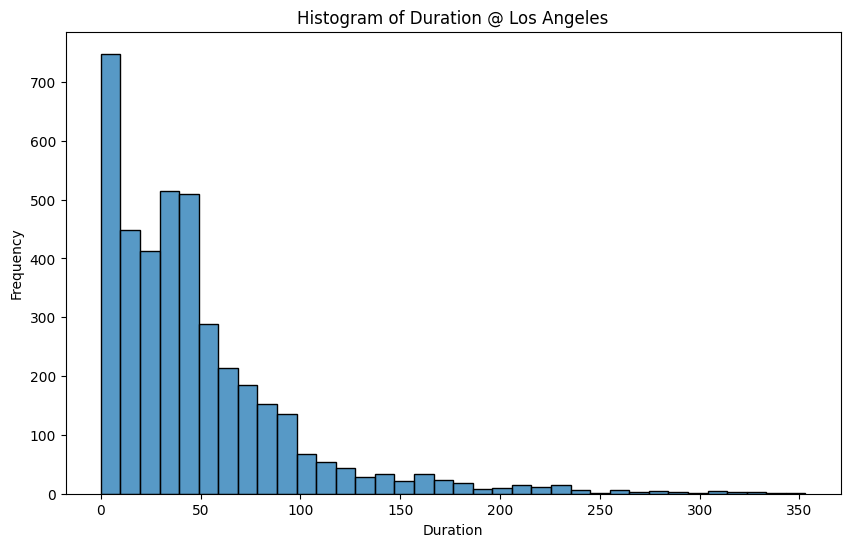

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(losangeles_df.loc[~losangeles_df.index.isin(outlier_duration)]['duration'], bins=36)
plt.title(f"Histogram of Duration @ Los Angeles")
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


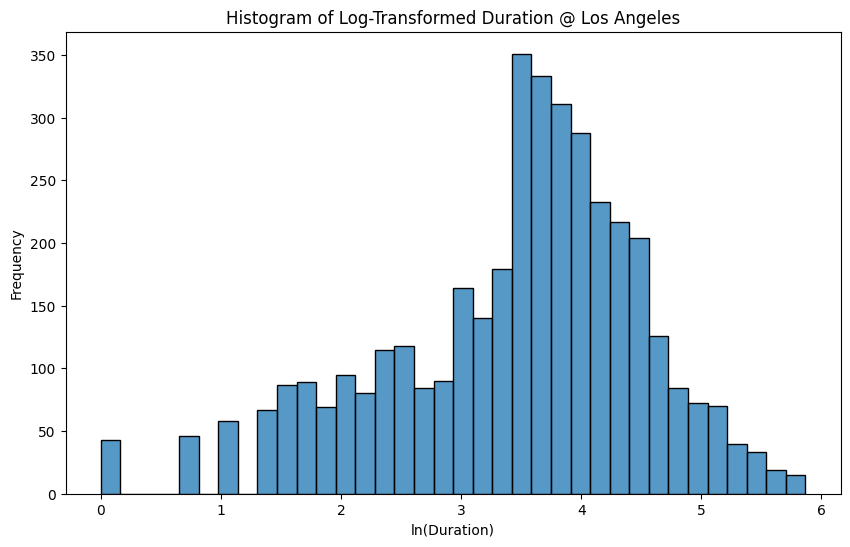

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log(losangeles_df.loc[~losangeles_df.index.isin(outlier_duration)]['duration']), bins=36)
plt.title(f"Histogram of Log-Transformed Duration @ Los Angeles")
plt.xlabel('ln(Duration)')
plt.ylabel('Frequency')
plt.show()

## Zipcode

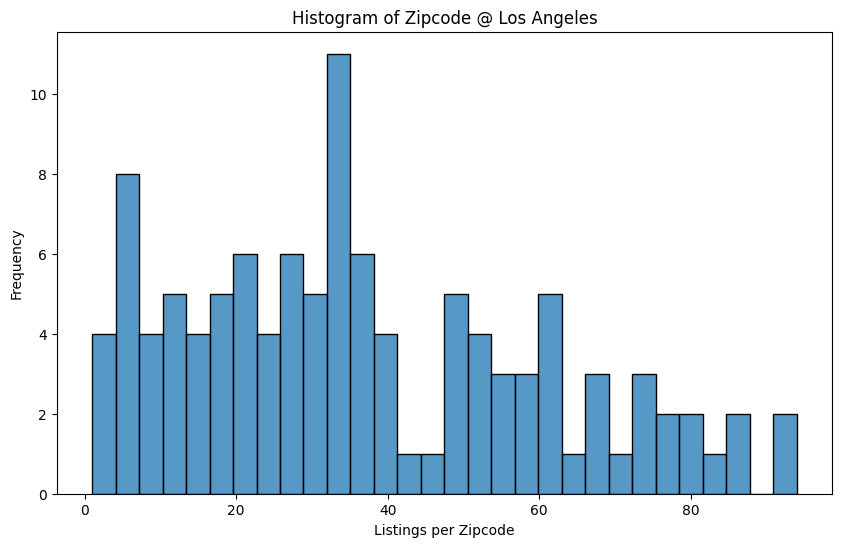

In [ ]:
counts_df = losangeles_df['zipcode'].value_counts().reset_index()
counts_df.columns = ['zipcode', 'count']

plt.figure(figsize=(10, 6))
sns.histplot(counts_df['count'], bins=30)
plt.title(f"Histogram of Zipcode @ Los Angeles")
plt.xlabel('Listings per Zipcode')
plt.ylabel('Frequency')
plt.show()

In [ ]:
lower_value = 10
outlier_zipcode = losangeles_df[losangeles_df['zipcode'].isin(counts_df[counts_df['count'] < lower_value]['zipcode'])].index
print(f"Houses in zipcodes with less than {lower_value} listings @ Los Angeles: {len(outlier_zipcode)}({100*len(outlier_zipcode)/losangeles_df.shape[0]:.2f}%)")
print(outlier_zipcode)

Houses in zipcodes with less than 10 listings @ Los Angeles: 71(1.75%)
Index([ 8550,  8657,  8689,  8847,  8895,  9155,  9162,  9170,  9254,  9460,
        9467,  9850,  9875,  9908,  9932,  9985,  9990, 10110, 10141, 10170,
       10259, 10282, 10329, 10338, 10394, 10433, 10487, 10617, 10681, 10686,
       10719, 10799, 10853, 10995, 11054, 11201, 11302, 11330, 11374, 11503,
       11519, 11546, 11564, 11659, 11709, 11719, 11801, 11805, 11839, 11848,
       11895, 12145, 12287, 12327, 12460, 12489, 12517, 12571, 12572, 12794,
       12822, 12971, 13085, 13179, 13340, 13501, 13517, 14002, 14095, 14129,
       14322],
      dtype='int64')


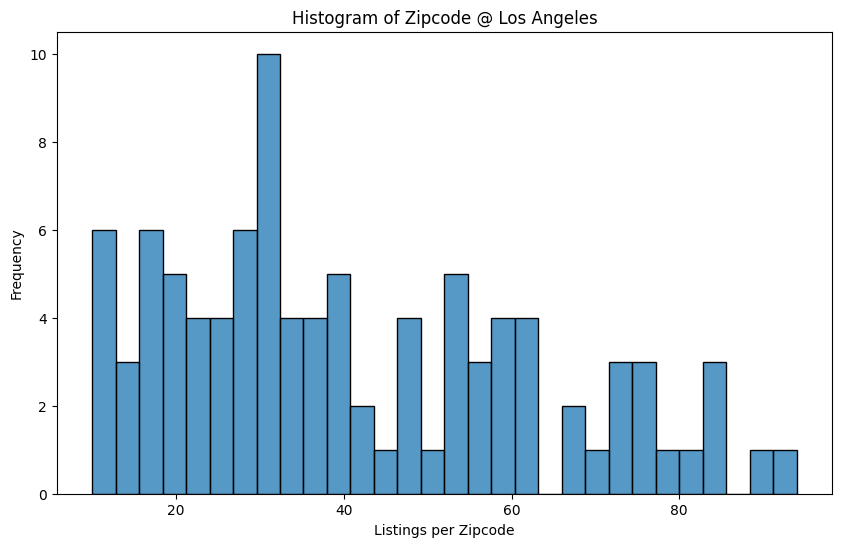

In [ ]:
counts_df = losangeles_df.loc[~losangeles_df.index.isin(outlier_zipcode)]['zipcode'].value_counts().reset_index()
counts_df.columns = ['zipcode', 'count']

plt.figure(figsize=(10, 6))
sns.histplot(counts_df['count'], bins=30)
plt.title(f"Histogram of Zipcode @ Los Angeles")
plt.xlabel('Listings per Zipcode')
plt.ylabel('Frequency')
plt.show()

## Description

### Length

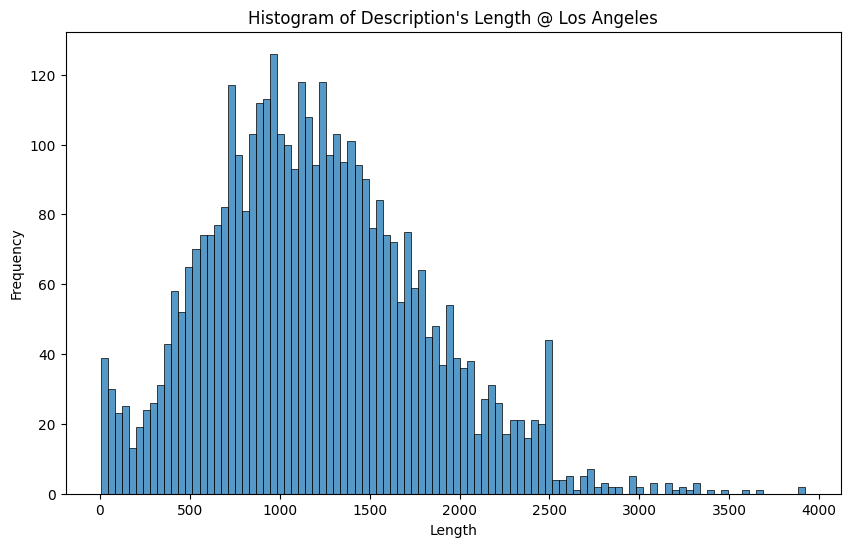

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(losangeles_df['description'].str.len(), bins=100)
plt.title(f"Histogram of Description's Length @ Los Angeles")
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
lower_value = 50
upper_value = 3000

lower_percentile = percentileofscore(losangeles_df['description'].str.len(), lower_value)
upper_percentile = percentileofscore(losangeles_df['description'].str.len(), upper_value)

outlier_length = losangeles_df[(losangeles_df['description'].str.len()< lower_value)].index

print(f"Length: {lower_value}({lower_percentile:.2f}%)")
print(outlier_length)

Length: 50(1.14%)
Index([ 8572,  8661,  8776,  8802,  8871,  9191,  9198,  9230,  9311,  9325,
        9327,  9501,  9534,  9615,  9620,  9668,  9868,  9910,  9914, 10097,
       10136, 10272, 10277, 10448, 10677, 10785, 11026, 11079, 11084, 11139,
       11422, 11456, 11459, 11873, 12324, 12547, 12902, 13188, 13364, 13420,
       13443, 13531, 13532, 13824, 13837],
      dtype='int64')


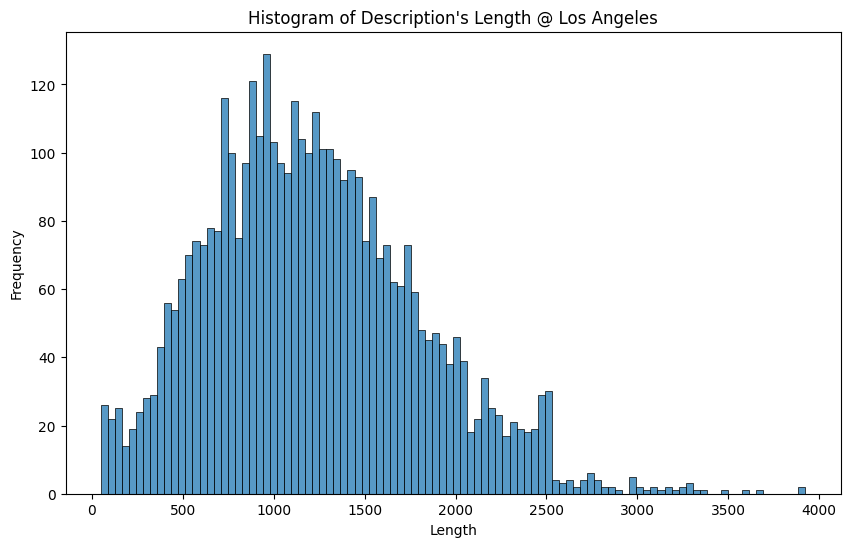

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(losangeles_df.loc[~losangeles_df.index.isin(outlier_length)]['description'].str.len(), bins=100)
plt.title(f"Histogram of Description's Length @ Los Angeles")
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

## House Attribute

### Parking

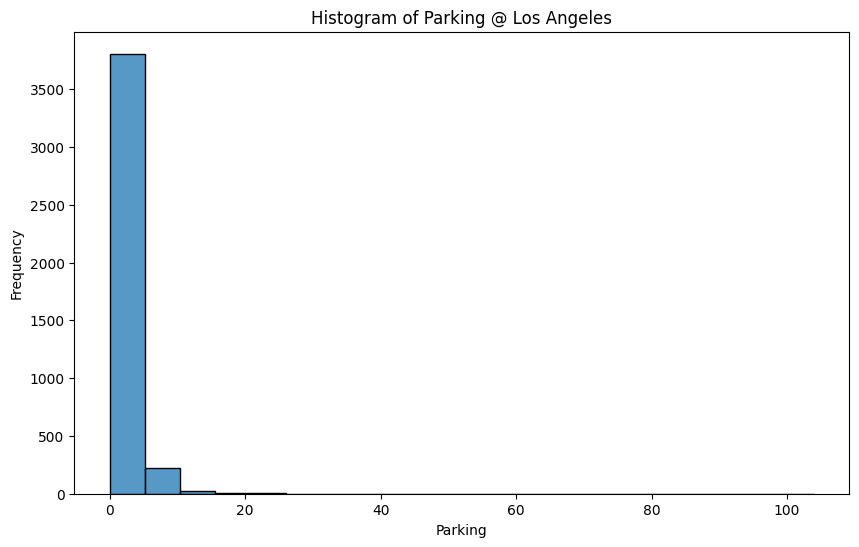

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(losangeles_df['resoFacts.parkingCapacity'].astype(float), bins=20)
plt.title(f"Histogram of Parking @ Los Angeles")
plt.xlabel('Parking')
plt.ylabel('Frequency')
plt.show()

In [ ]:
lower_value = 0
upper_value = 10

lower_percentile = percentileofscore(losangeles_df['resoFacts.parkingCapacity'].astype(float), lower_value)
upper_percentile = percentileofscore(losangeles_df['resoFacts.parkingCapacity'].astype(float), upper_value)

outlier_parking = losangeles_df[(losangeles_df['resoFacts.parkingCapacity'].astype(float) > upper_value)].index

print(f"Parking: {upper_value}({upper_percentile:.2f}%)")
print(outlier_parking)

Parking: 10(98.88%)
Index([ 8533,  8729,  9009,  9134,  9241,  9327,  9454, 10029, 10032, 10231,
       10449, 10670, 10990, 11014, 11080, 11263, 11271, 11281, 11918, 12052,
       12510, 12606, 12643, 12719, 12750, 12837, 12840, 12949, 13341, 13342,
       13504, 13613, 13633, 13638, 13801, 13841, 14109],
      dtype='int64')


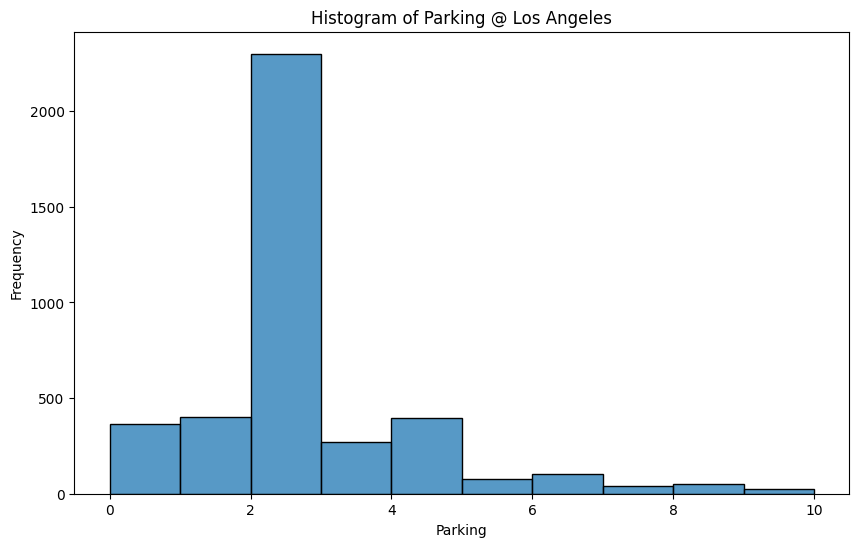

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(losangeles_df.loc[~losangeles_df.index.isin(outlier_parking)]['resoFacts.parkingCapacity'].astype(float), bins=10)
plt.title(f"Histogram of Parking @ Los Angeles")
plt.xlabel('Parking')
plt.ylabel('Frequency')
plt.show()

### Bathroom

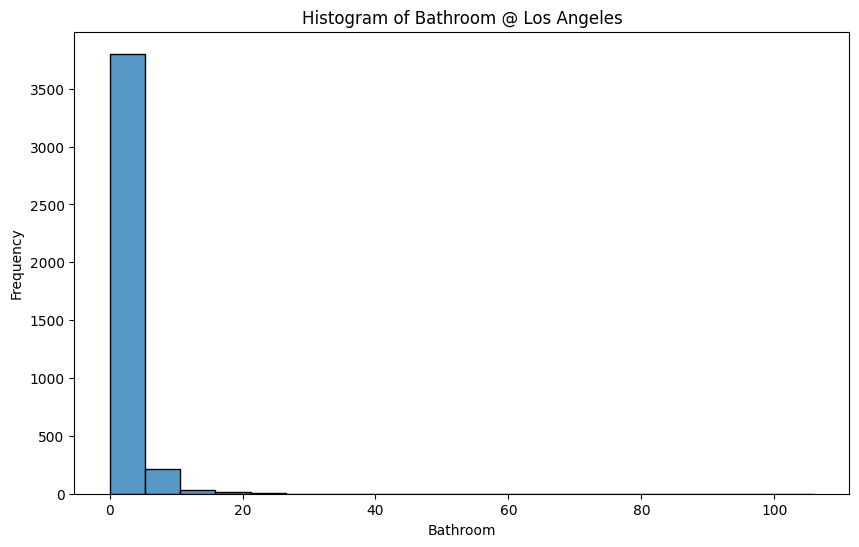

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(losangeles_df['resoFacts.bathroomsFloat'].astype(float), bins=20)
plt.title(f"Histogram of Bathroom @ Los Angeles")
plt.xlabel('Bathroom')
plt.ylabel('Frequency')
plt.show()

In [ ]:
lower_value = 0
upper_value = 10

lower_percentile = percentileofscore(losangeles_df['resoFacts.bathroomsFloat'].astype(float), lower_value)
upper_percentile = percentileofscore(losangeles_df['resoFacts.bathroomsFloat'].astype(float), upper_value)

outlier_bathroom = losangeles_df[(losangeles_df['resoFacts.bathroomsFloat'].astype(float) > upper_value)].index

print(f"Bathroom: {upper_value}({upper_percentile:.2f}%)")
print(outlier_bathroom)

Bathroom: 10(98.68%)
Index([ 8533,  8729,  8816,  8957,  9001,  9061,  9104,  9241,  9301,  9306,
        9327,  9454, 10199, 10315, 10327, 10449, 10603, 10917, 11080, 11130,
       11271, 11279, 11281, 11399, 11412, 11609, 11773, 11775, 11918, 12219,
       12510, 12606, 12643, 12686, 12750, 12792, 12837, 12840, 13016, 13018,
       13330, 13341, 13504, 13613, 13841, 14000, 14111],
      dtype='int64')


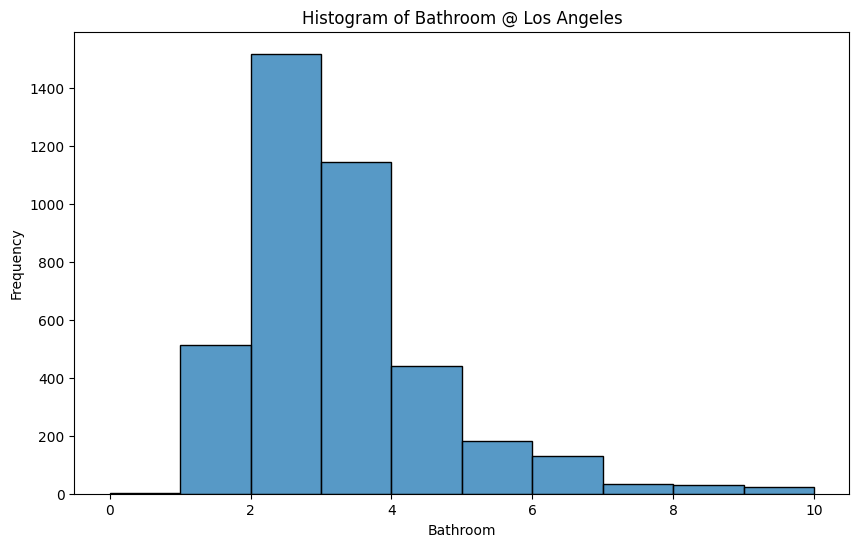

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(losangeles_df.loc[~losangeles_df.index.isin(outlier_bathroom)]['resoFacts.bathroomsFloat'].astype(float), bins=10)
plt.title(f"Histogram of Bathroom @ Los Angeles")
plt.xlabel('Bathroom')
plt.ylabel('Frequency')
plt.show()

### Bedroom

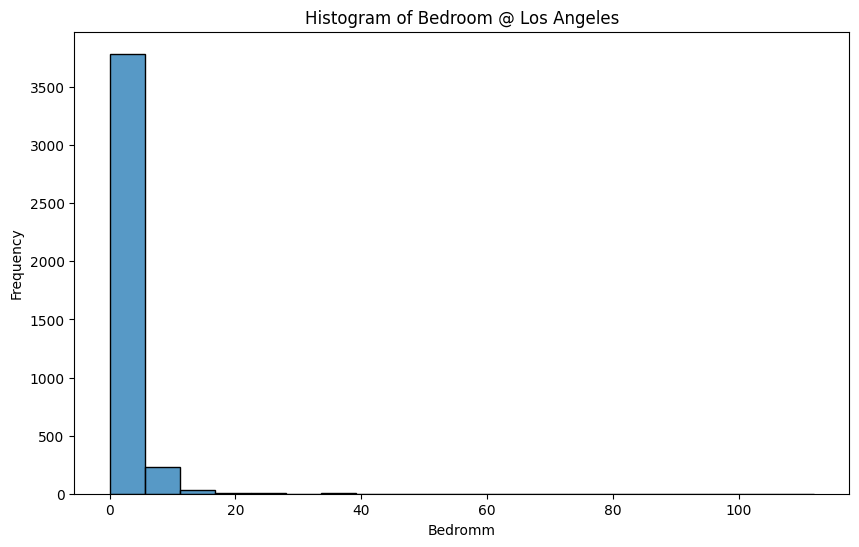

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(losangeles_df['resoFacts.bedrooms'].astype(float), bins=20)
plt.title(f"Histogram of Bedroom @ Los Angeles")
plt.xlabel('Bedromm')
plt.ylabel('Frequency')
plt.show()

In [ ]:
lower_value = 0
upper_value = 10

lower_percentile = percentileofscore(losangeles_df['resoFacts.bedrooms'].astype(float), lower_value)
upper_percentile = percentileofscore(losangeles_df['resoFacts.bedrooms'].astype(float), upper_value)

outlier_bedroom = losangeles_df[(losangeles_df['resoFacts.bedrooms'].astype(float) > upper_value)].index

print(f"Bedroom: {upper_value}({upper_percentile:.2f}%)")
print(outlier_bedroom)

Bedroom: 10(98.38%)
Index([ 8513,  8518,  8533,  8729,  8802,  8816,  8957,  9001,  9104,  9156,
        9241,  9299,  9301,  9312,  9327,  9454, 10113, 10231, 10284, 10315,
       10327, 10449, 10578, 10603, 10681, 10870, 10890, 10917, 11080, 11130,
       11271, 11279, 11281, 11291, 11412, 11487, 11609, 11773, 11775, 11918,
       12110, 12510, 12643, 12686, 12750, 12792, 12824, 12840, 13330, 13341,
       13371, 13504, 13613, 13841, 13844, 14000, 14002, 14048, 14204],
      dtype='int64')


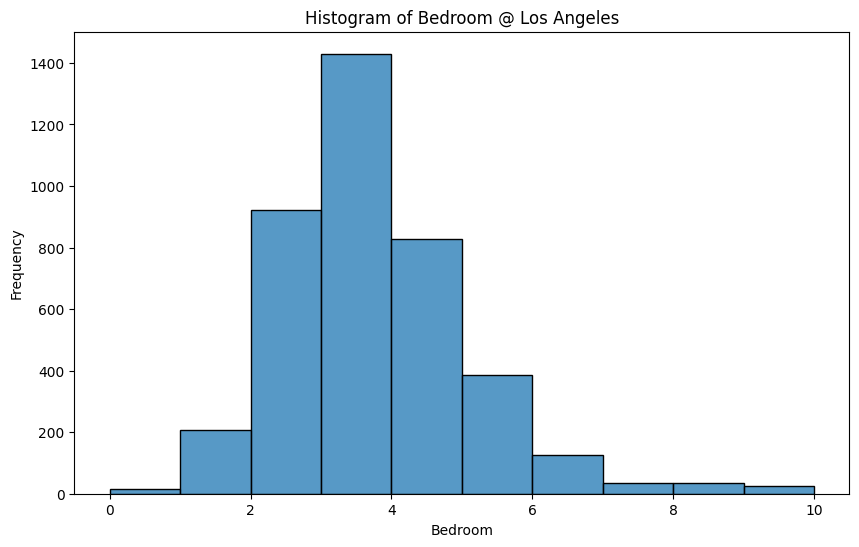

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(losangeles_df.loc[~losangeles_df.index.isin(outlier_bedroom)]['resoFacts.bedrooms'].astype(float), bins=10)
plt.title(f"Histogram of Bedroom @ Los Angeles")
plt.xlabel('Bedroom')
plt.ylabel('Frequency')
plt.show()

### Age

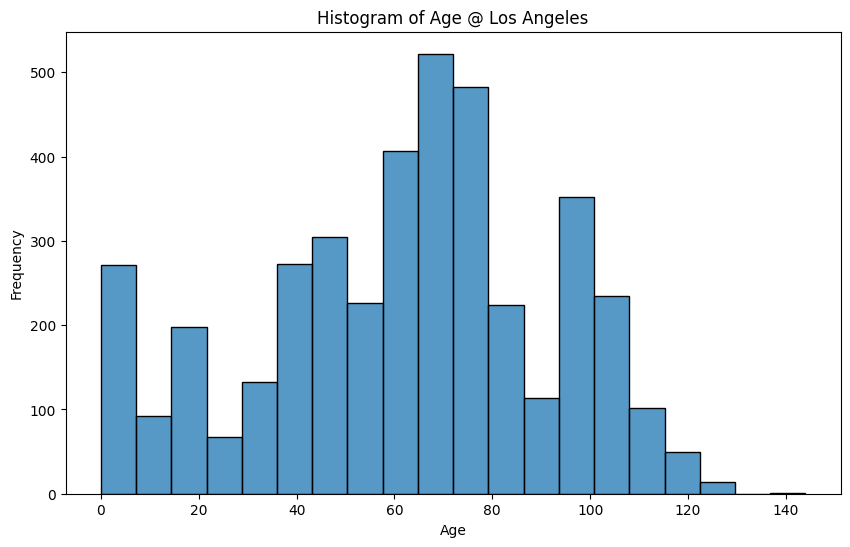

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(losangeles_df['age'], bins=20)
plt.title(f"Histogram of Age @ Los Angeles")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
lower_value = 0
upper_value = 120

lower_percentile = percentileofscore(losangeles_df['age'], lower_value)
upper_percentile = percentileofscore(losangeles_df['age'], upper_value)

outlier_age = losangeles_df[(losangeles_df['age'] > upper_value)].index

print(f"Age: {lower_value}({lower_percentile:.2f}%) to {upper_value}({upper_percentile:.2f}%)")
print(outlier_age)

Age: 0(0.77%) to 120(99.39%)
Index([ 8548,  9189,  9190,  9304,  9597,  9830, 10162, 10217, 10699, 11161,
       11321, 11390, 11406, 11676, 11874, 12289, 12318, 12510, 12923, 12943,
       13118, 13533, 13800, 14246, 14340],
      dtype='int64')


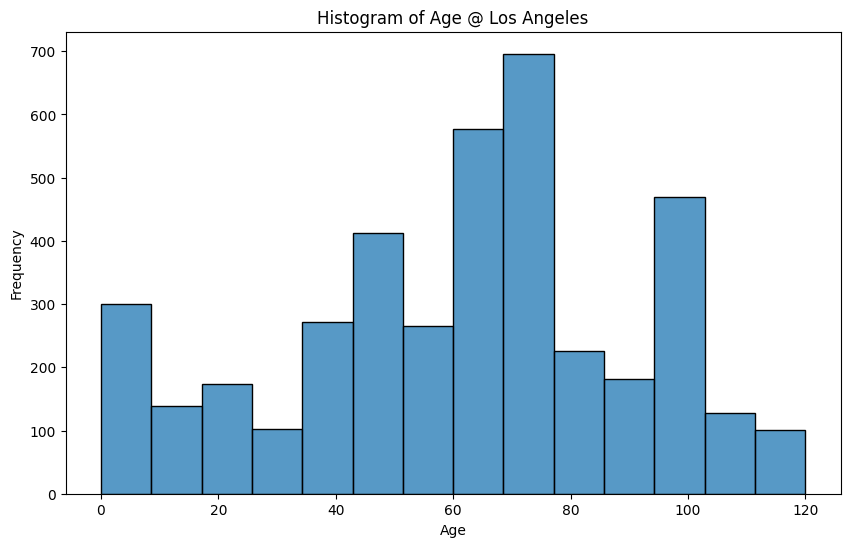

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(losangeles_df.loc[~losangeles_df.index.isin(outlier_age)]['age'], bins=14)
plt.title(f"Histogram of Age @ Los Angeles")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Living Area

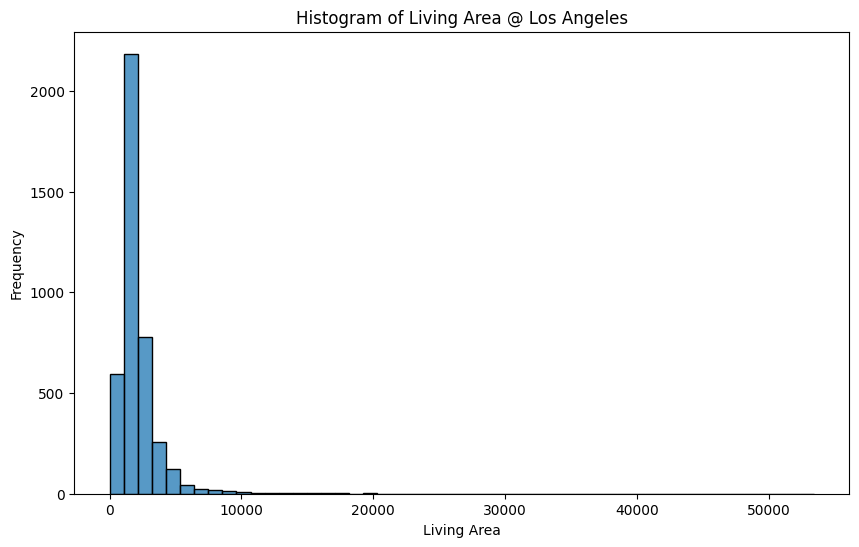

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(losangeles_df['livingArea'].astype(float), bins=50)
plt.title(f"Histogram of Living Area @ Los Angeles")
plt.xlabel('Living Area')
plt.ylabel('Frequency')
plt.show()

In [ ]:
lower_value = 0
upper_value = 1e4

lower_percentile = percentileofscore(losangeles_df['livingArea'].astype(float), lower_value)
upper_percentile = percentileofscore(losangeles_df['livingArea'].astype(float), upper_value)

outlier_livingArea = losangeles_df[(losangeles_df['livingArea'].astype(float) <= lower_value) | (losangeles_df['livingArea'].astype(float) > upper_value)].index

print(f"Living Area: {lower_value}({lower_percentile:.2f}%) to {upper_value}({upper_percentile:.2f}%)")
print(outlier_livingArea)

Living Area: 0(0.11%) to 10000.0(99.34%)
Index([ 8533,  8729,  8957,  9061,  9241,  9442,  9454,  9556,  9593,  9638,
        9955, 10199, 10327, 10387, 10448, 10917, 11271, 11281, 11399, 11609,
       12219, 12220, 12606, 12837, 12840, 13018, 13332, 13341, 13504, 13801,
       13841, 14059, 14109, 14111, 14126],
      dtype='int64')


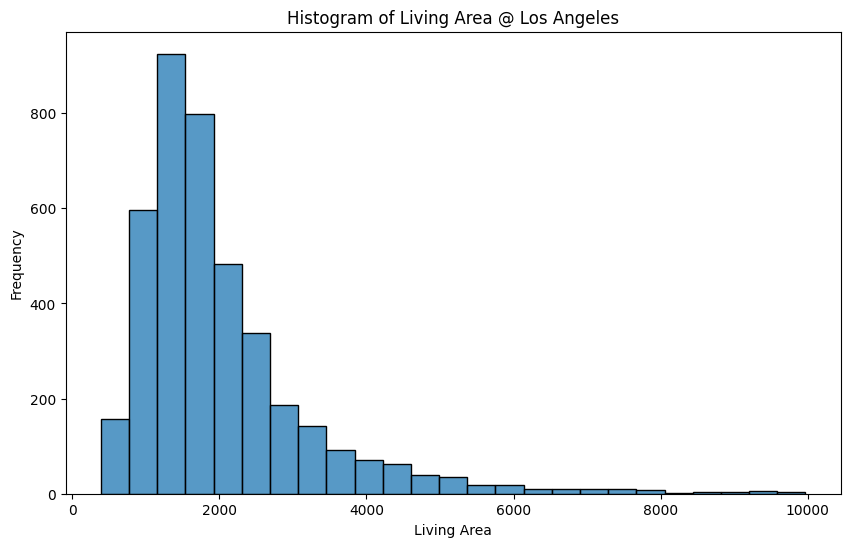

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(losangeles_df.loc[~losangeles_df.index.isin(outlier_livingArea)]['livingArea'].astype(float), bins=25)
plt.title(f"Histogram of Living Area @ Los Angeles")
plt.xlabel('Living Area')
plt.ylabel('Frequency')
plt.show()

## Drop

In [ ]:
print(f"{len(losangeles_df)} Listings")

losangeles_df = losangeles_df.loc[~losangeles_df.index.isin(outlier_price)]
print(f"Price: {len(losangeles_df)} Listings")

losangeles_df = losangeles_df.loc[~losangeles_df.index.isin(outlier_duration)]
print(f"Duration: {len(losangeles_df)} Listings")

losangeles_df = losangeles_df.loc[~losangeles_df.index.isin(outlier_zipcode)]
print(f"Zipcode: {len(losangeles_df)} Listings")

losangeles_df = losangeles_df.loc[~losangeles_df.index.isin(outlier_length)]
print(f"Desc) Length: {len(losangeles_df)} Listings")

losangeles_df = losangeles_df.loc[~losangeles_df.index.isin(outlier_parking)]
print(f"HA) Parking: {len(losangeles_df)} Listings")

losangeles_df = losangeles_df.loc[~losangeles_df.index.isin(outlier_bathroom)]
print(f"HA) Bathroom: {len(losangeles_df)} Listings")

losangeles_df = losangeles_df.loc[~losangeles_df.index.isin(outlier_bedroom)]
print(f"HA) Bedroom: {len(losangeles_df)} Listings")

losangeles_df = losangeles_df.loc[~losangeles_df.index.isin(outlier_age)]
print(f"HA) Age: {len(losangeles_df)} Listings")

losangeles_df = losangeles_df.loc[~losangeles_df.index.isin(outlier_livingArea)]
print(f"HA) Living Area: {len(losangeles_df)} Listings")

4066 Listings
Price: 4017 Listings
Duration: 3990 Listings
Zipcode: 3920 Listings
Desc) Length: 3878 Listings
HA) Parking: 3847 Listings
HA) Bathroom: 3824 Listings
HA) Bedroom: 3806 Listings
HA) Age: 3784 Listings
HA) Living Area: 3776 Listings


# Merge & Save

In [ ]:
import geopandas as gpd

zillow_cleaned_df = pd.concat([chicago_df, newyork_df, losangeles_df])
zillow_cleaned_df = zillow_cleaned_df.reset_index(drop=True)

zillow_cleaned_df['geometry'] = gpd.points_from_xy(zillow_cleaned_df['longitude'], zillow_cleaned_df['latitude'])
zillow_cleaned_df['zipcode'] = zillow_cleaned_df['zipcode'].apply(lambda x: int(float(x)) if pd.notnull(x) else 0)
zillow_cleaned_df['region'] = zillow_cleaned_df['state'].map({'IL': 'CH', 'NY': 'NY', 'CA': 'LA'})
zillow_cleaned_df['single'] = zillow_cleaned_df['homeType'].map({'SINGLE_FAMILY': 0, 'TOWNHOUSE': 1, 'CONDO': 1, 'MULTI_FAMILY': 1, 'APARTMENT': 1})
zillow_cleaned_df['days_on_zillow'] = zillow_cleaned_df['timeOnZillow'].str.extract(r'(\d+)').fillna(0).astype(int)

## Submarket

In [ ]:
zillow_cleaned_df['zipcode'].unique()

array([60617, 60616, 60612, 60614, 60640, 60620, 60630, 60618, 60619,
       60611, 60626, 60638, 60607, 60601, 60644, 60625, 60652, 60610,
       60647, 60657, 60642, 60608, 60656, 60628, 60622, 60629, 60623,
       60643, 60634, 60655, 60613, 60659, 60649, 60605, 60653, 60646,
       60615, 60654, 60631, 60651, 60637, 60645, 60641, 60660, 60707,
       60609, 60621, 60661, 60636, 60639, 60632, 11105, 10021, 10463,
       10465, 11235, 11429, 10309, 11356, 11368, 11385, 11234, 11231,
       11372, 10306, 11435, 10007, 10002, 10471, 11355, 10472, 10301,
       10303, 11225, 11419, 10014, 11418, 10019, 10024, 11422, 11358,
       11230, 11209, 11201, 10304, 10473, 10305, 11360, 10022, 10461,
       10312, 11434, 10457, 10314, 10302, 11219, 10029, 10075, 10006,
       10069, 11221, 11224, 10128, 10016, 11229, 11203, 11436, 11691,
       11208, 11367, 10469, 10310, 11207, 10308, 10307, 11414, 11238,
       11236, 11373, 10010, 10023, 11374, 11364, 10467, 11694, 11375,
       11101, 10453,

In [ ]:
def assign_submarket(zipcode):

    chicago_submarkets = {
        'Central': ['60601', '60602', '60603', '60604', '60605', '60606', '60607', '60611', '60654', '60661'],
        'North': ['60610', '60613', '60614', '60618', '60625', '60626', '60640', '60641', '60645', '60657', '60659', '60660'],
        'South': ['60615', '60616', '60617', '60619', '60620', '60628', '60636', '60637', '60643', '60649', '60653'],
        'West': ['60608', '60609', '60612', '60621', '60622', '60623', '60624', '60629', '60632', '60639', '60642', '60644', '60647', '60651'],
        'Northwest': ['60630', '60631', '60634', '60646', '60656', '60707'],
        'Southwest': ['60638', '60652', '60655'],
        'Far South': ['60633', '60827']
    }

    nyc_submarkets = {
        'Manhattan Downtown': ['10002', '10003', '10005', '10006', '10007', '10012', '10013', '10014', '10038'],
        'Manhattan Midtown': ['10001', '10010', '10011', '10016', '10017', '10018', '10019', '10022', '10036', '10065', '10069', '10075'],
        'Manhattan Uptown': ['10021', '10023', '10024', '10025', '10026', '10027', '10028', '10029', '10031', '10032', '10033', '10040', '10128'],
        'Brooklyn North': ['11205', '11206', '11211', '11216', '11217', '11221', '11222', '11237', '11238', '11249'],
        'Brooklyn South': ['11201', '11203', '11204', '11207', '11208', '11209', '11210', '11213', '11214', '11215', '11218', '11219', '11220', '11223', '11224', '11225', '11226', '11228', '11229', '11230', '11231', '11232', '11233', '11234', '11235', '11236'],
        'Queens West': ['11101', '11102', '11103', '11104', '11105', '11106', '11368', '11369', '11370', '11372', '11373', '11374', '11375', '11377', '11378', '11379', '11385'],
        'Queens East': ['11004', '11005', '11354', '11355', '11356', '11357', '11358', '11359', '11360', '11361', '11362', '11363', '11364', '11365', '11366', '11367', '11411', '11412', '11413', '11414', '11415', '11416', '11417', '11418', '11419', '11420', '11421', '11422', '11423', '11426', '11427', '11428', '11429', '11432', '11433', '11434', '11435', '11436', '11691', '11692', '11693', '11694', '11695', '11697'],
        'Bronx': ['10451', '10452', '10453', '10454', '10455', '10456', '10457', '10458', '10459', '10460', '10461', '10462', '10463', '10464', '10465', '10466', '10467', '10468', '10469', '10470', '10471', '10472', '10473'],
        'Staten Island': ['10301', '10302', '10303', '10304', '10305', '10306', '10307', '10308', '10309', '10310', '10312', '10314']
    }

    la_submarkets = {
        'Downtown/Central LA': ['90012', '90013', '90014', '90015', '90017', '90019', '90020', '90026', '90029', '90031', '90033', '90039', '90057', '90065'],
        'West LA': ['90077', '90024', '90025', '90034', '90035', '90045', '90049', '90064', '90066', '90067', '90094', '90210', '90230', '90232', '90272', '90291', '90292', '90293'],
        'South LA': ['90001', '90002', '90003', '90007', '90008', '90011', '90016', '90018', '90037', '90043', '90044', '90047', '90059', '90061', '90062'],
        'Hollywood/Wilshire': ['90004', '90005', '90006', '90027', '90028', '90036', '90038', '90046', '90048', '90068', '90069'],
        'San Fernando Valley': ['91040', '91042', '91303', '91304', '91306', '91307', '91311', '91316', '91324', '91325', '91326', '91331', '91335', '91340', '91342', '91343', '91344', '91345', '91352', '91356', '91364', '91367', '91401', '91402', '91403', '91405', '91406', '91411', '91423', '91436', '91601', '91602', '91604', '91605', '91606', '91607'],
        'East LA': ['90022', '90023', '90032', '90040', '90041', '90042', '90063'],
        'South Bay': ['90245', '90247', '90248', '90254', '90260', '90266', '90274', '90277', '90278', '90501', '90710', '90717', '90731', '90732', '90744', '90745', '90746', '90810']
    }

    zipcode = str(zipcode)

    for submarket, zipcodes in chicago_submarkets.items():
        if zipcode in zipcodes:
            return f"{submarket}"

    for submarket, zipcodes in nyc_submarkets.items():
        if zipcode in zipcodes:
            return f"{submarket}"

    for submarket, zipcodes in la_submarkets.items():
        if zipcode in zipcodes:
            return f"{submarket}"

    return "Other"

zillow_cleaned_df['submarket'] = zillow_cleaned_df['zipcode'].apply(assign_submarket)

In [ ]:
!pip install cartoframes shapely --quiet

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.5/245.5 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 41.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
branca 0.8.0 requires jinja2>=3, but you have jinja2 2.11.3 which is incompatible.
flask 3.0.3 requires Jinja2>=3.1.2, but you have jinja2 2.11.3 which is incompatible.
nbconvert 7.16.4 requires jinja2>=3.0, but you have jinja2 2.11.3 which is incompatible.
sphinx 

In [ ]:
count = zillow_cleaned_df.groupby(['region', 'submarket']).size().reset_index(name='count')
count

region            submarket  count
0      CH              Central    465
1      CH                North   1015
2      CH            Northwest    336
3      CH                South    740
4      CH            Southwest    214
5      CH                 West    545
6      LA  Downtown/Central LA    326
7      LA              East LA    135
8      LA   Hollywood/Wilshire    359
9      LA  San Fernando Valley   1617
10     LA            South Bay    172
11     LA             South LA    380
12     LA              West LA    787
13     NY                Bronx    359
14     NY       Brooklyn North    103
15     NY       Brooklyn South    591
16     NY   Manhattan Downtown     83
17     NY    Manhattan Midtown    180
18     NY     Manhattan Uptown    129
19     NY          Queens East    530
20     NY          Queens West    282
21     NY        Staten Island    763

In [ ]:
from shapely import wkt

ch_zip = pd.read_csv(os.path.join(main_dir, 'dataset', '1. ch_zip.csv'))
ch_zip['geometry'] = ch_zip['the_geom'].apply(wkt.loads)
ch_zip_gdf = gpd.GeoDataFrame(ch_zip, geometry='geometry')
ch_zip_gdf

for idx, row in ch_zip_gdf.iterrows():
    ch_zip_gdf.loc[idx, 'submarket'] = assign_submarket(row['ZIP'])

ch_zip_gdf = ch_zip_gdf.loc[:, ['ZIP', 'geometry', 'submarket']]
ch_zip_gdf = ch_zip_gdf.rename(columns={'ZIP': 'zipcode'})
ch_zip_gdf = ch_zip_gdf[ch_zip_gdf['submarket'] != 'Other']
ch_zip_gdf

zipcode                                           geometry  submarket
0     60647  MULTIPOLYGON (((-87.67762 41.91776, -87.67761 ...       West
1     60639  MULTIPOLYGON (((-87.72683 41.92265, -87.72693 ...       West
2     60707  MULTIPOLYGON (((-87.785 41.90915, -87.78531 41...  Northwest
3     60622  MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ...       West
4     60651  MULTIPOLYGON (((-87.70656 41.89555, -87.70672 ...       West
5     60611  MULTIPOLYGON (((-87.61401 41.89354, -87.61369 ...    Central
6     60638  MULTIPOLYGON (((-87.74347 41.81876, -87.74346 ...  Southwest
7     60652  MULTIPOLYGON (((-87.68305 41.75741, -87.68304 ...  Southwest
8     60626  MULTIPOLYGON (((-87.66421 42.02126, -87.66419 ...      North
9     60615  MULTIPOLYGON (((-87.58103 41.80421, -87.58089 ...      South
10    60621  MULTIPOLYGON (((-87.62491 41.76545, -87.6249 4...       West
11    60645  MULTIPOLYGON (((-87.68838 42.01952, -87.68789 ...      North
12    60643  MULTIPOLYGON (((-87.64191 41.67781, -87.64185 ...      South
13    60660  MULTIPOLYGON (((-87.6546 41.99824, -87.65453 4...      North
14    60640  MULTIPOLYGON (((-87.65054 41.98383, -87.65058 ...      North
15    60614  MULTIPOLYGON (((-87.63138 41.93297, -87.63138 ...      North
16    60631  MULTIPOLYGON (((-87.85665 41.98443, -87.85664 ...  Northwest
17    60646  MULTIPOLYGON (((-87.79065 42.0004, -87.79054 4...  Northwest
18    60628  MULTIPOLYGON (((-87.58515 41.7216, -87.58518 4...      South
19    60625  MULTIPOLYGON (((-87.67896 41.96146, -87.67913 ...      North
20    60641  MULTIPOLYGON (((-87.72698 41.93179, -87.72721 ...      North
21    60657  MULTIPOLYGON (((-87.63799 41.94816, -87.63791 ...      North
22    60636  MULTIPOLYGON (((-87.65392 41.75759, -87.65878 ...      South
23    60649  MULTIPOLYGON (((-87.54328 41.75205, -87.54584 ...      South
24    60617  MULTIPOLYGON (((-87.54304 41.75192, -87.54303 ...      South
25    60633  MULTIPOLYGON (((-87.60045 41.67432, -87.58363 ...  Far South
26    60643  MULTIPOLYGON (((-87.64125 41.6581, -87.64143 4...      South
27    60612  MULTIPOLYGON (((-87.67704 41.89564, -87.67704 ...       West
28    60604  MULTIPOLYGON (((-87.63376 41.87924, -87.63375 ...    Central
29    60624  MULTIPOLYGON (((-87.70567 41.86641, -87.70588 ...       West
30    60656  MULTIPOLYGON (((-87.87596 41.97299, -87.87589 ...  Northwest
31    60644  MULTIPOLYGON (((-87.73998 41.86596, -87.73999 ...       West
32    60655  MULTIPOLYGON (((-87.68184 41.71366, -87.68183 ...  Southwest
33    60603  MULTIPOLYGON (((-87.61633 41.88211, -87.61635 ...    Central
34    60605  MULTIPOLYGON (((-87.62064 41.87705, -87.6174 4...    Central
35    60653  MULTIPOLYGON (((-87.60267 41.83123, -87.60259 ...      South
36    60609  MULTIPOLYGON (((-87.62665 41.83091, -87.62664 ...       West
38    60618  MULTIPOLYGON (((-87.67855 41.94686, -87.67855 ...      North
39    60616  MULTIPOLYGON (((-87.60271 41.83135, -87.60586 ...      South
40    60602  MULTIPOLYGON (((-87.60997 41.88436, -87.60997 ...    Central
41    60601  MULTIPOLYGON (((-87.62271 41.88884, -87.62232 ...    Central
42    60608  MULTIPOLYGON (((-87.64671 41.85991, -87.6467 4...       West
43    60607  MULTIPOLYGON (((-87.63962 41.87677, -87.63928 ...    Central
44    60661  MULTIPOLYGON (((-87.63997 41.88905, -87.63999 ...    Central
45    60606  MULTIPOLYGON (((-87.63397 41.88753, -87.63397 ...    Central
46    60827  MULTIPOLYGON (((-87.58479 41.6447, -87.58567 4...  Far South
47    60630  MULTIPOLYGON (((-87.75244 41.98323, -87.75148 ...  Northwest
48    60642  MULTIPOLYGON (((-87.66707 41.88885, -87.66709 ...       West
49    60659  MULTIPOLYGON (((-87.67946 41.98322, -87.68945 ...      North
50    60707  MULTIPOLYGON (((-87.80662 41.93451, -87.80686 ...  Northwest
51    60634  MULTIPOLYGON (((-87.76625 41.93128, -87.76661 ...  Northwest
52    60613  MULTIPOLYGON (((-87.63894 41.95009, -87.64283 ...      North
53    60610  MULTIPOLYGON (((-87.6282 41.89668, -87.6282 41...      North
54    60

In [ ]:
from cartoframes.viz import *
from shapely.ops import unary_union

layer_ch_1 = Layer(ch_zip_gdf, color_category_style('submarket', opacity=0.3))

boundary_df_ch = pd.read_csv(os.path.join(main_dir, 'dataset', '1. boundary_ch.csv'))
boundary_df_ch['geometry'] = boundary_df_ch['the_geom'].apply(wkt.loads)
boundary_gdf_ch = gpd.GeoDataFrame(boundary_df_ch, geometry='geometry')

outer_boundary = unary_union(boundary_gdf_ch['geometry']).boundary
outer_boundary_gdf = gpd.GeoDataFrame(geometry=[outer_boundary], crs=boundary_gdf_ch.crs)

layer_ch_2 = Layer(outer_boundary_gdf, basic_style(opacity=0.5, color='black'))

Map([layer_ch_1, layer_ch_2])

In [ ]:
ny_zip = pd.read_csv(os.path.join(main_dir, 'dataset', '1. ny_zip.csv'))
ny_zip['geometry'] = ny_zip['the_geom'].apply(wkt.loads)
ny_zip_gdf = gpd.GeoDataFrame(ny_zip, geometry='geometry')
ny_zip_gdf

for idx, row in ny_zip_gdf.iterrows():
    ny_zip_gdf.loc[idx, 'submarket'] = assign_submarket(row['MODZCTA'])

ny_zip_gdf = ny_zip_gdf.loc[:, ['MODZCTA', 'geometry', 'submarket']]
ny_zip_gdf = ny_zip_gdf.rename(columns={'MODZCTA': 'zipcode'})
ny_zip_gdf = ny_zip_gdf[ny_zip_gdf['submarket'] != 'Other']
ny_zip_gdf

zipcode                                           geometry  \
0      10001  MULTIPOLYGON (((-73.98774 40.74407, -73.98819 ...   
1      10002  MULTIPOLYGON (((-73.9975 40.71407, -73.99709 4...   
2      10003  MULTIPOLYGON (((-73.98864 40.72293, -73.98876 ...   
3      10026  MULTIPOLYGON (((-73.96201 40.80551, -73.96007 ...   
5      10005  MULTIPOLYGON (((-74.00783 40.70309, -74.00786 ...   
..       ...                                                ...   
172    11433  MULTIPOLYGON (((-73.79437 40.68691, -73.79478 ...   
173    11434  MULTIPOLYGON (((-73.75461 40.6472, -73.7538 40...   
174    11435  MULTIPOLYGON (((-73.80577 40.68293, -73.80606 ...   
175    11694  MULTIPOLYGON (((-73.86496 40.56663, -73.86558 ...   
176    11697  MULTIPOLYGON (((-73.86289 40.57606, -73.86281 ...   

              submarket  
0     Manhattan Midtown  
1    Manhattan Downtown  
2    Manhattan Downtown  
3      Manhattan Uptown  
5    Manhattan Downtown  
..                  ...  
172         Queens East  
173         Queens East  
174         Queens East  
175         Queens East  
176         Queens East  

[162 rows x 3 columns]

In [ ]:
layer_ny_1 = Layer(ny_zip_gdf,
                   color_category_style('submarket', opacity=0.3))

boundary_df_ny = pd.read_csv(os.path.join(main_dir, 'dataset', '1. boundary_ny.csv'))
boundary_df_ny['geometry'] = boundary_df_ny['the_geom'].apply(wkt.loads)
boundary_gdf_ny = gpd.GeoDataFrame(boundary_df_ny, geometry='geometry')

outer_boundary = unary_union(boundary_gdf_ny['geometry']).boundary
outer_boundary_gdf = gpd.GeoDataFrame(geometry=[outer_boundary], crs=boundary_gdf_ny.crs)

layer_ny_2 = Layer(outer_boundary_gdf, basic_style(opacity=0.5, color='black'))

Map([layer_ny_1, layer_ny_2])

In [ ]:
la_zip = gpd.read_file(os.path.join(main_dir, 'dataset', '1. la_zip.geojson'))

for idx, row in la_zip.iterrows():
    la_zip.loc[idx, 'submarket'] = assign_submarket(row['ZIPCODE'])

la_zip = la_zip.loc[:, ['ZIPCODE', 'geometry', 'submarket']]
la_zip = la_zip.rename(columns={'ZIPCODE': 'zipcode'})
la_zip = la_zip[la_zip['submarket'] != 'Other']
la_zip

zipcode                                           geometry  \
0     90001  POLYGON ((-118.24338 33.98924, -118.24348 33.9...   
1     90002  POLYGON ((-118.23431 33.96101, -118.23442 33.9...   
2     90003  POLYGON ((-118.28285 33.97597, -118.28285 33.9...   
3     90004  POLYGON ((-118.2841 34.08349, -118.28438 34.08...   
4     90005  MULTIPOLYGON (((-118.33541 34.06179, -118.3353...   
..      ...                                                ...   
249   91604  POLYGON ((-118.40353 34.15648, -118.40363 34.1...   
250   91605  POLYGON ((-118.38343 34.22156, -118.38517 34.2...   
251   91606  POLYGON ((-118.40234 34.19396, -118.40257 34.1...   
252   91607  POLYGON ((-118.39327 34.17944, -118.39342 34.1...   
307   90013  POLYGON ((-118.24894 34.05166, -118.24917 34.0...   

               submarket  
0               South LA  
1               South LA  
2               South LA  
3     Hollywood/Wilshire  
4     Hollywood/Wilshire  
..                   ...  
249  San Fernando Valley  
250  San Fernando Valley  
251  San Fernando Valley  
252  San Fernando Valley  
307  Downtown/Central LA  

[119 rows x 3 columns]

In [ ]:
layer_la_1 = Layer(la_zip,
                   color_category_style('submarket', opacity=0.3))

boundary_df_la = pd.read_csv(os.path.join(main_dir, 'dataset', '1. boundary_la.csv'))
boundary_df_la['geometry'] = boundary_df_la['the_geom'].apply(wkt.loads)
boundary_gdf_la = gpd.GeoDataFrame(boundary_df_la, geometry='geometry')

outer_boundary = unary_union(boundary_gdf_la['geometry']).boundary
outer_boundary_gdf = gpd.GeoDataFrame(geometry=[outer_boundary], crs=boundary_gdf_la.crs)

layer_la_2 = Layer(outer_boundary_gdf, basic_style(opacity=0.5, color='black'))

Map([layer_la_1, layer_la_2])

## Columns

In [ ]:
columns = {
    # Basic Information
    'zpid': 'zpid', # Unique ID for zillow listing
    'geometry': 'geometry', # Coordinate(lon, lat)
    'region': 'city', # CH(Chicago, IL), NY(New York, NY), LA(Los Angeles, CA)
    'submarket': 'submarket', # Neighborhood or region
    'zipcode': 'zipcode',
    'streetAddress': 'address', # Street level address
    # Target Variable
    'price': 'price', # USD
    'favoriteCount': 'like',
    'pageViewCount': 'view',
    'duration': 'duration', # Posted day - Sold day
    'days_on_zillow': 'day', # How long the property had been listed
    # Independent Variable
    'single': 'single', # 0: Single Family, 1: Sharing(Condo, Multi Family, Apartment, Townhouse)
    'resoFacts.parkingCapacity': 'parking', # Parking lots
    'resoFacts.bathroomsFloat': 'bathroom', # Full + Half baths
    'resoFacts.bedrooms': 'bedroom',
    'age': 'age', # 2024 - Year built
    'livingArea': 'living', # Living area(sqft)
    'description': 'description'
    }

types = {
    # Basic Information
    'zpid': 'string',
    'city': 'string',
    'submarket': 'string',
    'zipcode': 'string',
    'address': 'string',
    # Target Variable
    'price': 'int64',
    'like': 'int64',
    'view': 'int64',
    'duration': 'int64',
    'day': 'int64',
    # Independent Variable
    'single': 'int64',
    'parking': 'float64',
    'bathroom': 'float64',
    'bedroom': 'float64',
    'age': 'float64',
    'living': 'float64',
    'description': 'string'
}

zillow_cleaned_df = zillow_cleaned_df[list(columns.keys())].rename(columns=columns)

In [ ]:
zillow_cleaned_gdf = gpd.GeoDataFrame(zillow_cleaned_df, geometry='geometry')
zillow_cleaned_gdf = zillow_cleaned_gdf.astype(types)
zillow_cleaned_gdf = zillow_cleaned_gdf.set_crs(epsg=4326)

In [ ]:
zillow_cleaned_gdf

zpid                     geometry city            submarket  \
0         4171164   POINT (-87.53252 41.69706)   CH                South   
1        80851025   POINT (-87.63969 41.84879)   CH                South   
2      2127908883   POINT (-87.69721 41.87457)   CH                 West   
3        60265291   POINT (-87.66872 41.93097)   CH                North   
4         3700052   POINT (-87.65439 41.97993)   CH                North   
...           ...                          ...  ...                  ...   
10106    20383564  POINT (-118.41126 33.96461)   LA              West LA   
10107    20510134  POINT (-118.40809 34.05322)   LA              West LA   
10108    19905411  POINT (-118.54884 34.20552)   LA  San Fernando Valley   
10109   302794497  POINT (-118.41388 33.97678)   LA              West LA   
10110    20463351  POINT (-118.44704 34.02491)   LA              West LA   

      zipcode                     address    price  like  view  duration  day  \
0       60617            10905 S Avenue H   309000     0    20       134   64   
1       60616        475 W 24th St APT 5H   265000     0    44        50    7   
2       60612  2827 W Congress Pkwy APT 3   230000     0     7        90   83   
3       60614      2712 N Ashland Ave #4A   460271     0    20        25   64   
4       60640  5415 N Sheridan Rd APT 306   319000     2   112        37   40   
...       ...                         ...      ...   ...   ...       ...  ...   
10106   90045              8117 Chase Ave  1811700     4   186        41    7   
10107   90067  10128 Empyrean Way APT 302  2100000     0    17       178   79   
10108   91335           7428 Vanalden Ave   815000     0    59         5   47   
10109   90094            12678 Millennium  3715000     1   140        78   12   
10110   90064             2587 S Bundy Dr  1250000     0    62        71   68   

       single  parking  bathroom  bedroom   age  living  \
0           0      2.5       4.0      4.0  81.0  2376.0   
1           1      1.0       2.0      2.0  19.0   900.0   
2           1      1.0       2.0      2.0  17.0  1300.0   
3           1      1.0       2.0      2.0  24.0  1700.0   
4           1      1.0       2.0      2.0  51.0  1250.0   
...       ...      ...       ...      ...   ...     ...   
10106       0      4.0       3.0      4.0  78.0  1892.0   
10107       1      2.0       4.0      2.0  45.0  2498.0   
10108       0      2.0       1.0      3.0  72.0  1670.0   
10109       0      3.0       5.0      4.0   7.0  3639.0   
10110       0      4.0       2.0      3.0  84.0  1321.0   

                                             description  
0      Tastefully and professionally updated 4BR / 3....  
1      Experience City living as its finest in this t...  
2      Offering exceptional comfort, convenience, and...  
3      Looking for an updated extra-wide 2 bed/2 bath...  
4      Discover the allure of this 2-bed, 2-bath gem ...  
...                                                  ...  
10106  Welcome to this impressive Westchester home vi...  
10107  From the foyer, enter to a sophisticated livin...  
10108  Major Equity opportunity in the City of Reseda...  
10109  Embrace luxury living and the best in Playa Vi...  
10110  Welcome to 2587 S. Bundy, where charm meets en...  

[10111 rows x 18 columns]

In [ ]:
zillow_cleaned_gdf.to_file(os.path.join(main_dir, 'dataset', '2. zillow_cleaned.geojson'), driver='GeoJSON')

# Statistics

In [ ]:
zillow_cleaned_gdf.groupby(['city', 'single'])['price'].describe()

count          mean           std       min       25%  \
city single                                                           
CH   0       1510.0  3.964249e+05  3.081168e+05   50000.0  229000.0   
     1       1805.0  4.524631e+05  3.015802e+05   50000.0  240000.0   
LA   0       2537.0  1.662312e+06  1.153819e+06  300000.0  905000.0   
     1       1239.0  9.446630e+05  5.750942e+05  306000.0  600000.0   
NY   0       1017.0  8.409004e+05  4.382682e+05  115000.0  629000.0   
     1       2003.0  1.053327e+06  9.994280e+05  105000.0  460000.0   

                   50%        75%        max  
city single                                   
CH   0        311750.0   455000.0  1999000.0  
     1        365000.0   582600.0  2000000.0  
LA   0       1295000.0  2000000.0  9500000.0  
     1        779999.0  1120000.0  6200000.0  
NY   0        740000.0   940000.0  5795000.0  
     1        790000.0  1233586.5  7000000.0

In [ ]:
zillow_cleaned_gdf.groupby(['city', 'single'])['duration'].describe()

count        mean        std  min   25%    50%    75%    max
city single                                                               
CH   0       1510.0   66.656291  48.887766  0.0  37.0   52.0   77.0  350.0
     1       1805.0   63.414404  46.778243  0.0  37.0   51.0   74.0  345.0
LA   0       2537.0   43.592038  43.869513  0.0  12.0   34.0   56.0  343.0
     1       1239.0   54.478612  50.373878  0.0  21.0   41.0   73.0  353.0
NY   0       1017.0  132.888889  68.788521  0.0  83.0  114.0  168.0  360.0
     1       2003.0  154.111333  72.586929  0.0  97.0  141.0  212.0  365.0

In [ ]:
zillow_cleaned_gdf.groupby(['city', 'single'])['parking'].describe()

count      mean       std  min  25%  50%  75%   max
city single                                                      
CH   0       1510.0  1.812848  0.800783  0.0  2.0  2.0  2.0   5.0
     1       1805.0  0.925762  0.656095  0.0  1.0  1.0  1.0   4.0
LA   0       2537.0  2.337406  1.529827  0.0  2.0  2.0  3.0  10.0
     1       1239.0  2.173527  1.415267  0.0  2.0  2.0  2.0  10.0
NY   0       1017.0  0.784661  0.925280  0.0  0.0  1.0  1.0   5.0
     1       2003.0  0.379431  0.788793  0.0  0.0  0.0  0.0   5.0

In [ ]:
zillow_cleaned_gdf.groupby(['city', 'single'])['bathroom'].describe()

count      mean       std  min  25%  50%  75%   max
city single                                                      
CH   0       1510.0  2.351656  0.950836  1.0  2.0  2.0  3.0   6.0
     1       1805.0  1.905263  0.869156  1.0  1.0  2.0  2.0   5.0
LA   0       2537.0  2.821048  1.361763  1.0  2.0  3.0  3.0  10.0
     1       1239.0  2.563358  1.213407  1.0  2.0  2.0  3.0  10.0
NY   0       1017.0  2.471976  0.867984  1.0  2.0  2.0  3.0   6.0
     1       2003.0  2.171742  1.174768  1.0  1.0  2.0  3.0   6.0

In [ ]:
zillow_cleaned_gdf.groupby(['city', 'single'])['bedroom'].describe()

count      mean       std  min  25%  50%  75%   max
city single                                                      
CH   0       1510.0  3.693377  0.984652  0.0  3.0  4.0  4.0   6.0
     1       1805.0  2.053186  0.960672  0.0  1.0  2.0  3.0   5.0
LA   0       2537.0  3.498226  1.021118  0.0  3.0  3.0  4.0  10.0
     1       1239.0  2.752220  1.698838  0.0  2.0  2.0  3.0  10.0
NY   0       1017.0  3.276303  0.806811  1.0  3.0  3.0  4.0   9.0
     1       2003.0  2.812282  1.828214  0.0  1.0  2.0  4.0   9.0

In [ ]:
zillow_cleaned_gdf.groupby(['city', 'single'])['age'].describe()

count       mean        std  min   25%   50%    75%    max
city single                                                             
CH   0       1510.0  82.850331  31.751021  0.0  68.0  81.0  104.0  140.0
     1       1805.0  50.480332  35.862052  0.0  21.0  49.0   71.0  140.0
LA   0       2537.0  67.392590  28.752280  0.0  60.0  71.0   86.0  120.0
     1       1239.0  49.313963  26.788329  0.0  34.0  45.0   60.0  118.0
NY   0       1017.0  74.006883  29.700688  0.0  54.0  79.0   99.0  125.0
     1       2003.0  59.130804  35.806267  0.0  25.0  62.0   91.0  125.0

In [ ]:
zillow_cleaned_gdf.groupby(['city', 'single'])['living'].describe()

count         mean          std    min      25%     50%     75%  \
city single                                                                     
CH   0       1510.0  1821.731126   871.214572  525.0  1186.25  1535.5  2200.0   
     1       1805.0  1411.510803   660.547004  388.0   900.00  1250.0  1709.0   
LA   0       2537.0  2115.188412  1098.648895  388.0  1379.00  1812.0  2510.0   
     1       1239.0  1628.220339   936.729846  471.0  1070.00  1399.0  1856.5   
NY   0       1017.0  1671.974435   634.378277  434.0  1250.00  1500.0  1950.0   
     1       2003.0  1521.640040   865.949189  216.0   850.00  1229.0  2003.0   

                max  
city single          
CH   0       5000.0  
     1       4655.0  
LA   0       8558.0  
     1       8822.0  
NY   0       5000.0  
     1       4875.0

# Visualize

In [ ]:
!pip install cartoframes shapely --quiet

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.5/245.5 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 54.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 2.2.5 requires Jinja2>=3.0, but you have jinja2 2.11.3 which is incompatible.
branca 0.8.0 requires jinja2>=3, but you have jinja2 2.11.3 which is incompatible.
nbconvert 6.5.4 requires jinja2>=3.0, but you have jinja2 2.11.3 which is incompatible.
werkzeug 3

In [ ]:
from cartoframes.viz import *
from shapely import wkt

In [ ]:
layer_ch_1 = Layer(boundary_gdf_ch, basic_style(opacity=0.3))
layer_ch_2 = Layer(
    zillow_cleaned_gdf[zillow_cleaned_gdf['city'] == 'CH'],
    color_bins_style('price', palette='sunset', size=3),
    popup_click=popup_element('zpid', title='House ID'),
    geom_col = 'geometry'
)

Map([layer_ch_1, layer_ch_2])

In [ ]:
layer_ch_3 = Layer(
    zillow_cleaned_gdf[zillow_cleaned_gdf['city'] == 'CH'],
    color_bins_style('duration', palette='sunset', size=3),
    popup_click=popup_element('zpid', title='House ID'),
    geom_col = 'geometry'
)

Map([layer_ch_1, layer_ch_3])

In [ ]:
zillow_cleaned_gdf[zillow_cleaned_gdf['city'] == 'CH'].shape[0]

3315

In [ ]:
boundary_df_ny = pd.read_csv(os.path.join(main_dir, 'dataset', '1. boundary_ny.csv'))
boundary_df_ny['geometry'] = boundary_df_ny['the_geom'].apply(wkt.loads)
boundary_gdf_ny = gpd.GeoDataFrame(boundary_df_ny, geometry='geometry')
layer_ny_1 = Layer(boundary_gdf_ny, basic_style(opacity=0.3), encode_data=False)
layer_ny_2 = Layer(
    zillow_cleaned_gdf[zillow_cleaned_gdf['city'] == 'NY'],
    color_bins_style('price', palette='sunset', size=3),
    popup_click=popup_element('zpid', title='House ID'),
    geom_col = 'geometry'
)

Map([layer_ny_1, layer_ny_2])

In [ ]:
layer_ny_3 = Layer(
    zillow_cleaned_gdf[zillow_cleaned_gdf['city'] == 'NY'],
    color_bins_style('duration', palette='sunset', size=3),
    popup_click=popup_element('zpid', title='House ID'),
    geom_col = 'geometry'
)

Map([layer_ny_1, layer_ny_3])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
zillow_cleaned_gdf[zillow_cleaned_gdf['city'] == 'NY'].shape[0]

3020

In [ ]:
boundary_df_la = pd.read_csv(os.path.join(main_dir, 'dataset', '1. boundary_la.csv'))
boundary_df_la['geometry'] = boundary_df_la['the_geom'].apply(wkt.loads)
boundary_gdf_la = gpd.GeoDataFrame(boundary_df_la, geometry='geometry')
layer_la_1 = Layer(boundary_gdf_la, basic_style(opacity=0.3))
layer_la_2 = Layer(
    zillow_cleaned_gdf[zillow_cleaned_gdf['city'] == 'LA'],
    color_bins_style('price', palette='sunset', size=3),
    popup_click=popup_element('zpid', title='House ID'),
    geom_col = 'geometry'
)

Map([layer_la_1, layer_la_2])

In [ ]:
layer_la_3 = Layer(
    zillow_cleaned_gdf[zillow_cleaned_gdf['city'] == 'LA'],
    color_bins_style('duration', palette='sunset', size=3),
    popup_click=popup_element('zpid', title='House ID'),
    geom_col = 'geometry'
)

Map([layer_la_1, layer_la_3])

In [ ]:
zillow_cleaned_gdf[zillow_cleaned_gdf['city'] == 'LA'].shape[0]

3776

In [ ]:
layer_all = Layer(
    zillow_cleaned_gdf,
    color_bins_style('price', palette='sunset', size=3),
    popup_click=popup_element('zpid', title='House ID'),
    geom_col = 'geometry'
)

Map([layer_all, layer_ch_1, layer_ny_1, layer_la_1])